In [1]:
import pandas as pd
import numpy as np
from scipy.stats import stats, levene, ttest_ind, spearmanr, chi2_contingency, shapiro, boxcox, probplot
from matplotlib import pyplot as plt

In [2]:
og_df = pd.read_csv('dataset/Housing.csv')
og_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df_copy = og_df.copy()
df_copy.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [4]:
og_df.shape

(545, 13)

In [5]:
og_df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
og_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
og_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### **Summary Statistics**

#### Price
- The average price of properties is approximately 4,766,729 dollars.
- Prices range from 1,750,000 to 13,300,000 dollars.
- 25% of properties are priced below 3,430,000 dollars, while 75% are priced below 5,740,000 dollars.
- There is considerable variability in property prices, as indicated by the standard deviation of approximately 1,870,439 dollars.

#### Area
- The average area of properties is approximately 5,150 square feet.
- Property areas range from 1,650 to 16,200 square feet.
- There is variability in property area, as indicated by the standard deviation of approximately 2,170 square feet.

#### Bedrooms
- The average number of bedrooms in properties is approximately 2.96.
- The number of bedrooms ranges from 1 to 6.
- Most properties have between 2 and 3 bedrooms, as indicated by the median of 3.

#### Bathrooms
- The average number of bathrooms in properties is approximately 1.28.
- The number of bathrooms ranges from 1 to 4.
- Most properties have 1 bathroom, as indicated by the median of 1.

#### Stories
- The average number of stories (floors) in properties is approximately 1.80.
- The number of stories ranges from 1 to 4.
- Most properties have between 1 and 2 stories, as indicated by the median of 2.

#### Parking
- The average number of parking spaces in properties is approximately 0.69.
- The number of parking spaces ranges from 0 to 3.
- Most properties have no parking spaces, as indicated by the median of 0.


### **Visualizing Numerical Variables Distribution using Histograms**

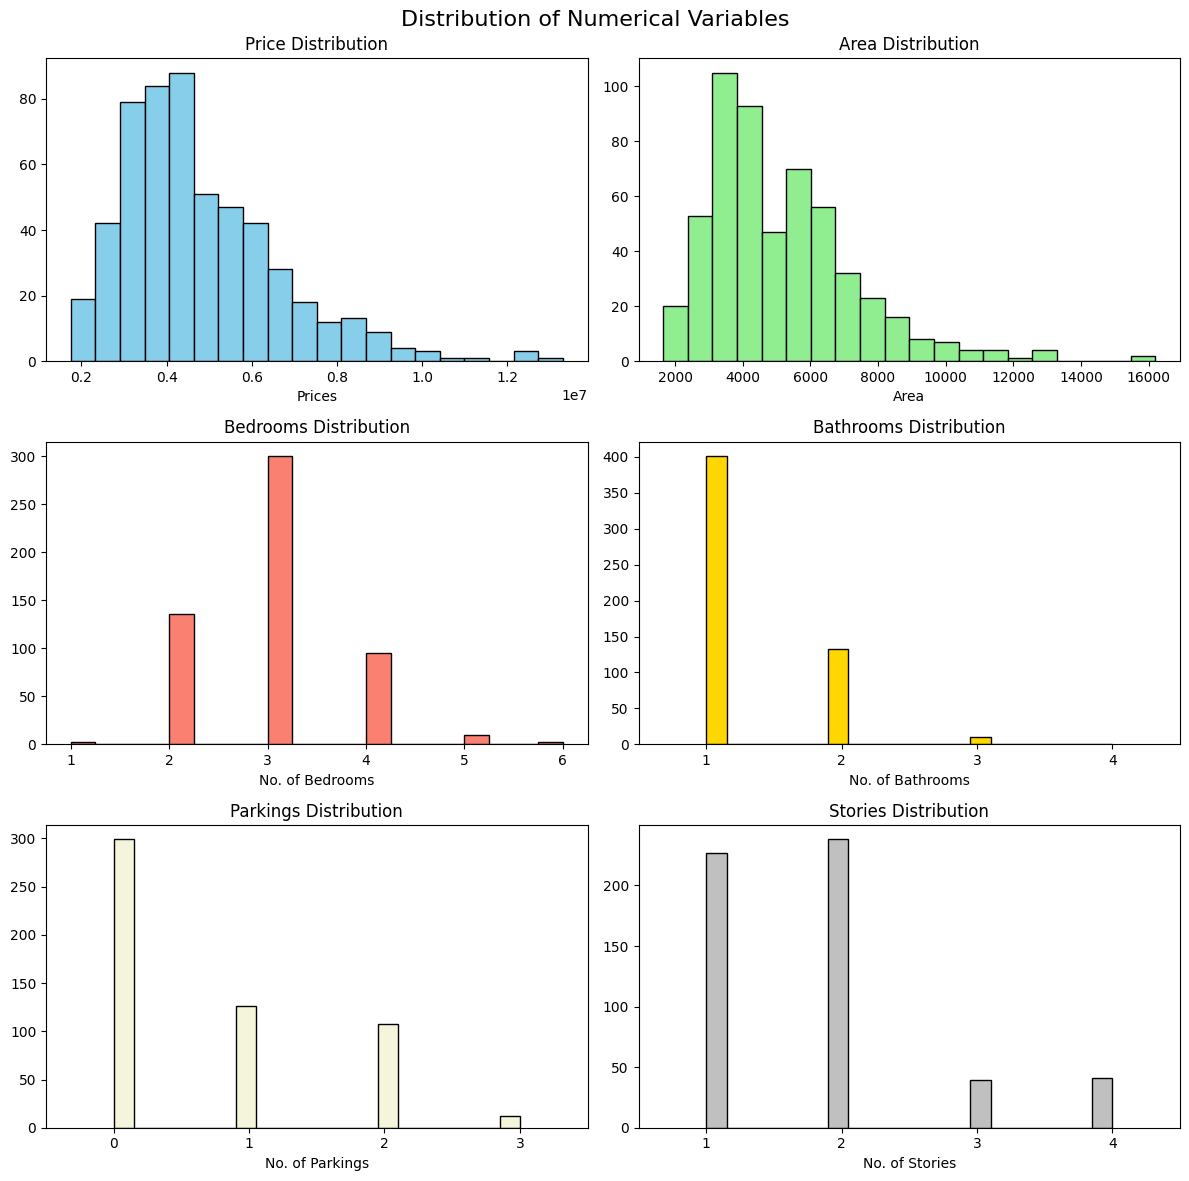

In [8]:
fig, ((axes1, axes2), (axes3, axes4), (axes5, axes6)) = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

axes1.hist(og_df['price'], bins=20, color='skyblue', edgecolor='black')
axes1.set_title('Price Distribution')
axes1.set_xlabel('Prices')

axes2.hist(og_df['area'], bins=20, color='lightgreen', edgecolor='black')
axes2.set_title('Area Distribution')
axes2.set_xlabel('Area')

axes3.hist(og_df['bedrooms'], bins=20, color='salmon', edgecolor='black')
axes3.set_title('Bedrooms Distribution')
axes3.set_xlabel('No. of Bedrooms')

axes4.hist(og_df['bathrooms'], bins=20, color='gold', edgecolor='black')
axes4.set_title('Bathrooms Distribution')
axes4.set_xlim(0.5, 4.5)
axes4.set_xticks([1, 2, 3, 4])
axes4.set_xlabel('No. of Bathrooms')

axes5.hist(og_df['parking'], bins=20, color='#F5F5DC', edgecolor='black')
axes5.set_title('Parkings Distribution')
axes5.set_xlim(-0.5, 3.5)
axes5.set_xticks([0, 1, 2, 3])
axes5.set_xlabel('No. of Parkings')

axes6.hist(og_df['stories'], bins=20, color='#C0C0C0', edgecolor='black')
axes6.set_title('Stories Distribution')
axes6.set_xlim(0.5, 4.5)
axes6.set_xticks([1, 2, 3, 4])
axes6.set_xlabel('No. of Stories')

plt.tight_layout()

## **Insights from the above distribution plots**

1. **Price Distribution**:
   - The distribution of prices appears to be right-skewed, with a longer tail towards higher prices. This suggests that there are relatively few properties with very high prices compared to the majority of properties with lower prices.

2. **Area Distribution**:
   - The distribution of property areas seems to be right-skewed, with a longer tail towards larger area values. This indicates that there are relatively few properties with very large areas compared to the majority of properties with smaller areas.

3. **Bedroom Distribution Insight:**
   - Not evenly distributed, ranging from 1 to 6 bedrooms.
   - 1-bedroom properties are very rare.
   - 2-bedroom properties are more common than 1-bedroom.
   - 3-bedroom properties are the most common, twice as frequent as 2-bedroom.
   - 4-bedroom properties are less common than 2 and 3-bedroom.
   - 5-bedroom properties are rarer than 4-bedroom.
   - 6-bedroom properties are as rare as 1-bedroom.

4. **Insight on Bathroom Distribution:**
   - Majority of properties have one bathroom, making it the most common configuration.
   - Properties with two bathrooms are less common, comprising less than half of those with one bathroom.
   - Properties with three bathrooms are significantly fewer than those with two bathrooms.
   - Properties with four bathrooms are the least common, with only one property having this configuration.

5. **Insight on Parking Space Distribution:**
   - Majority of properties have no parking spaces, the most common scenario.
   - Properties with one parking space are less common, comprising half of those with no parking spaces.
   - Properties with two parking spaces are slightly less common than those with one parking space.
   - Properties with three parking spaces are the least common, with significantly fewer instances than those with two parking spaces.

6. **Stories Distribution Insight:**
   - The distribution of stories among properties is not evenly distributed.
   - Properties with 2 stories are the most common, with the highest frequency observed in the distribution.
   - Properties with 1 story are also quite common, with a frequency slightly lower than 2-story properties.
   - Properties with 4 stories are less common, with a frequency that is higher than 3-story properties but significantly lower than 1 and 2-story properties.
   - Properties with 3 stories are the least common, with the lowest frequency observed in the distribution. This indicates that 3-story properties are relatively rare.

### **Visualization of Numerical Variables using Box Plots**

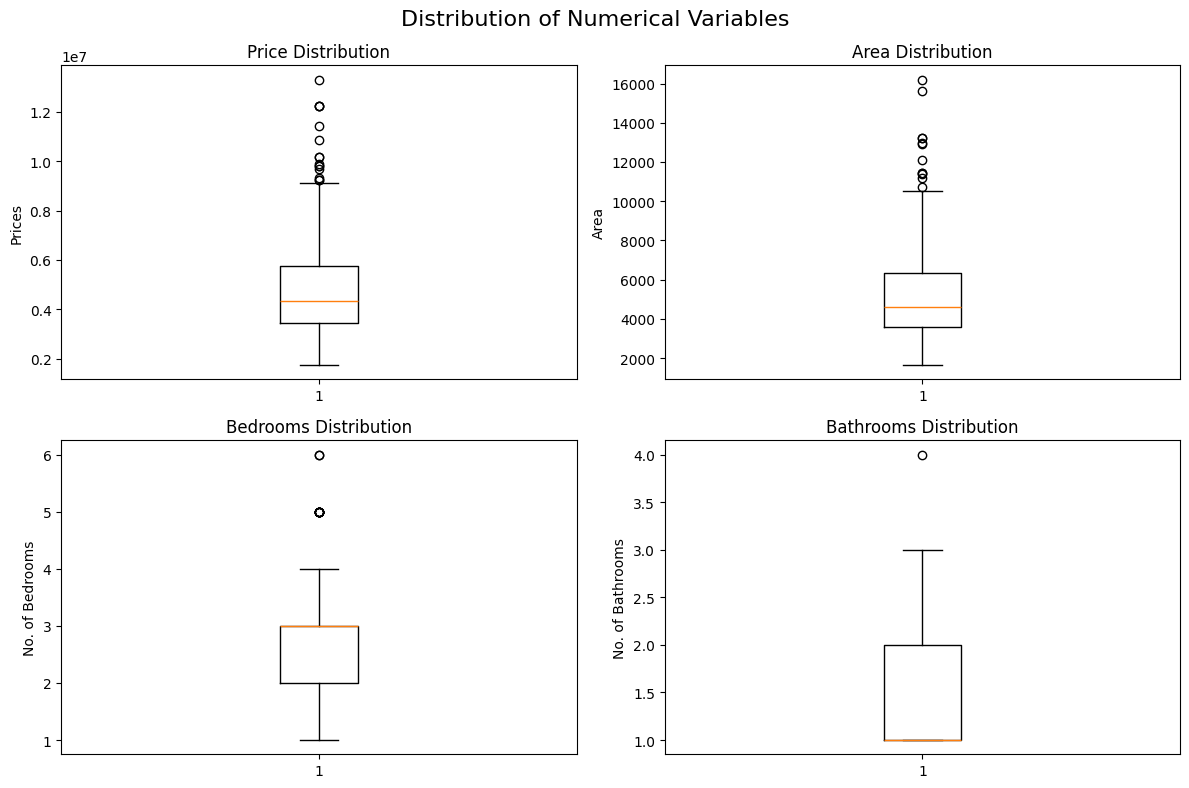

In [9]:
fig, ((axes1, axes2), (axes3, axes4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

axes1.boxplot(og_df['price'])
axes1.set_title('Price Distribution')
axes1.set_ylabel('Prices')

axes2.boxplot(og_df['area'])
axes2.set_title('Area Distribution')
axes2.set_ylabel('Area')

axes3.boxplot(og_df['bedrooms'])
axes3.set_title('Bedrooms Distribution')
axes3.set_ylabel('No. of Bedrooms')

axes4.boxplot(og_df['bathrooms'])
axes4.set_title('Bathrooms Distribution')
axes4.set_ylabel('No. of Bathrooms')

plt.tight_layout()

## **Insights from the above box plots**

1. **Price Distribution**:
   - There are some houses with prices significantly higher than the rest, as indicated by the outliers beyond the upper whisker of the box plot. These outliers may represent luxury properties or other exceptional cases.

2. **Area Distribution**: 
   - There are some properties with exceptionally large areas, as indicated by the outliers beyond the upper whisker of the box plot. These outliers may represent estates or properties with extensive land.

3. **Bedrooms Distribution**:
   - There are relatively fewer houses with a significantly higher number of bedrooms, as shown by the outliers beyond the upper whisker of the box plot. These outliers may represent large family homes or luxury properties.

4. **Bathrooms Distribution**:
   - There are relatively fewer houses with a significantly higher number of bathrooms, as shown by the outliers beyond the upper whisker of the box plot. These outliers may represent properties with extensive bathroom facilities, such as luxury estates or hotels.


### **Visualization of Categorical Variables using Bar Plot.**

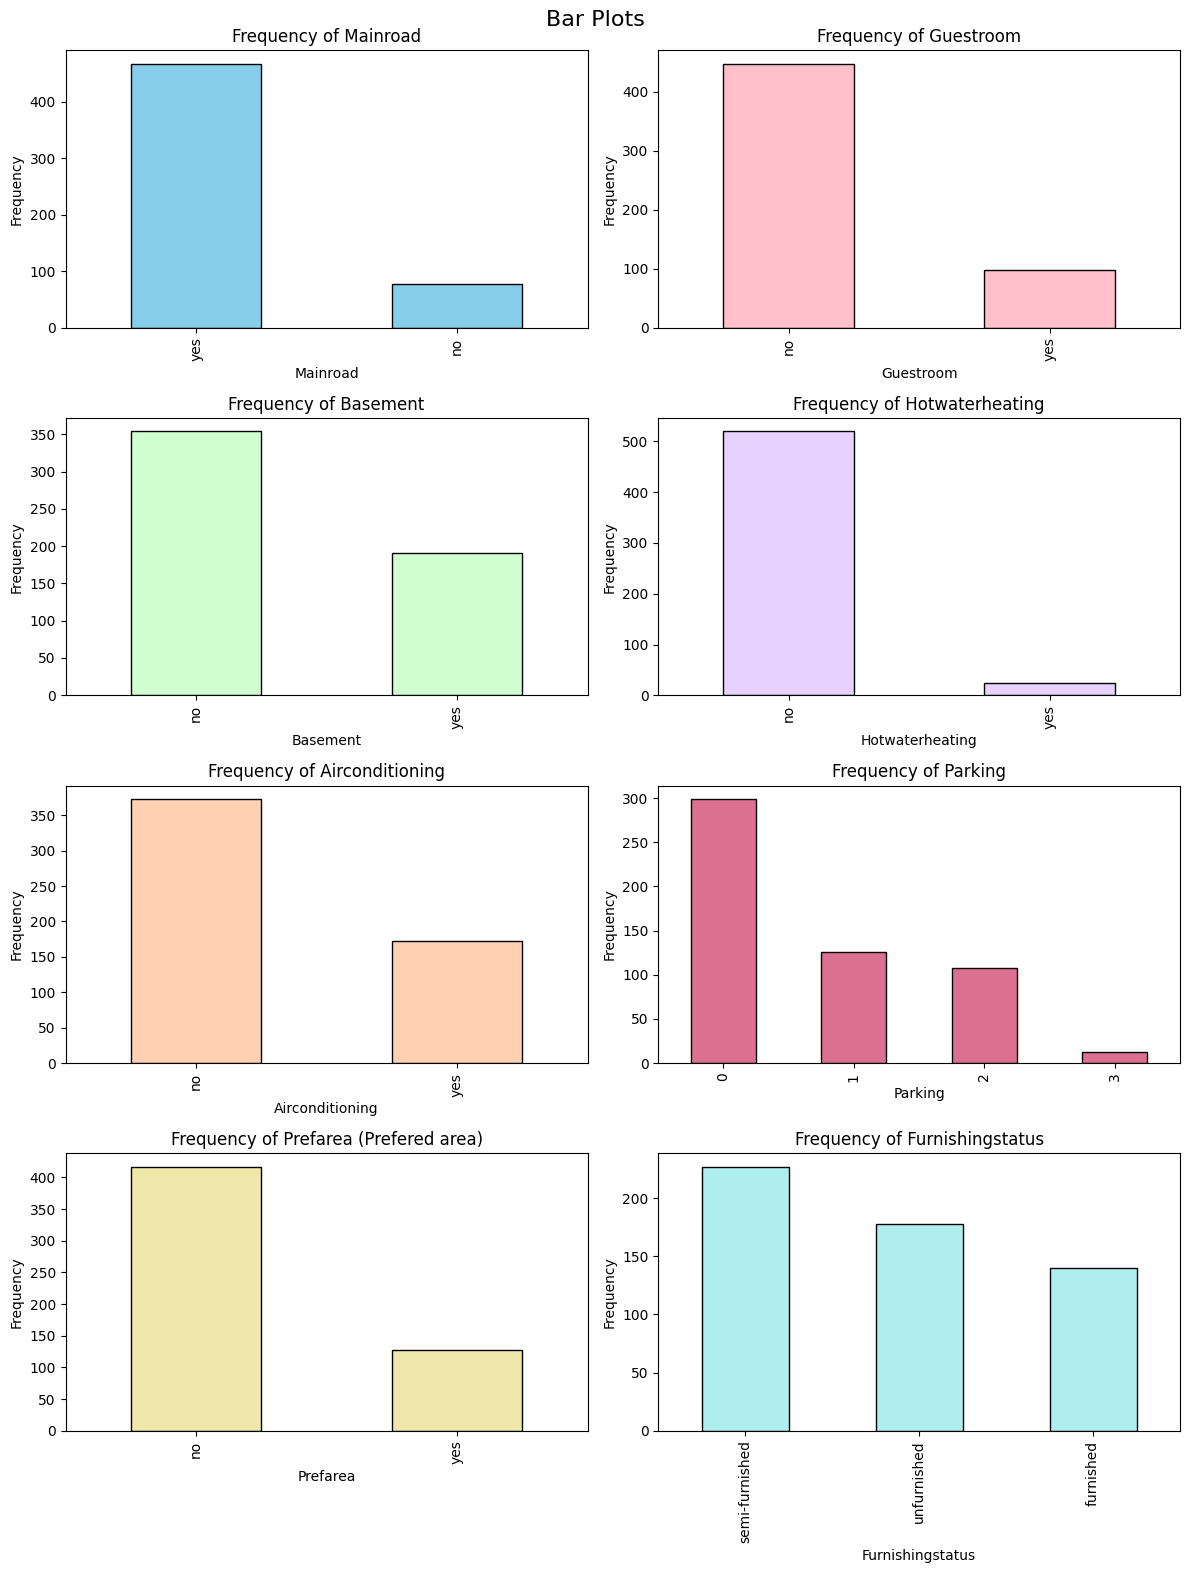

In [10]:
fig, ((axes1, axes2), (axes3, axes4), (axes5, axes6), (axes7, axes8)) = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
fig.suptitle('Bar Plots', fontsize=16)

og_df['mainroad'].value_counts().plot(kind='bar', ax=axes1, color='skyblue', edgecolor='black')
axes1.set_title('Frequency of Mainroad')
axes1.set_xlabel('Mainroad')
axes1.set_ylabel('Frequency')

og_df['guestroom'].value_counts().plot(kind='bar', ax=axes2, color='pink', edgecolor='black')
axes2.set_title('Frequency of Guestroom')
axes2.set_xlabel('Guestroom')
axes2.set_ylabel('Frequency')

og_df['basement'].value_counts().plot(kind='bar', ax=axes3, color='#D1FFD1', edgecolor='black')
axes3.set_title('Frequency of Basement')
axes3.set_xlabel('Basement')
axes3.set_ylabel('Frequency')

og_df['hotwaterheating'].value_counts().plot(kind='bar', ax=axes4, color='#E6D1FF', edgecolor='black')
axes4.set_title('Frequency of Hotwaterheating')
axes4.set_xlabel('Hotwaterheating')
axes4.set_ylabel('Frequency')

og_df['airconditioning'].value_counts().plot(kind='bar', ax=axes5, color='#FFD1B2', edgecolor='black')
axes5.set_title('Frequency of Airconditioning')
axes5.set_xlabel('Airconditioning')
axes5.set_ylabel('Frequency')

og_df['parking'].value_counts().plot(kind='bar', ax=axes6, color='#DB7093', edgecolor='black')
axes6.set_title('Frequency of Parking')
axes6.set_xlabel('Parking')
axes6.set_ylabel('Frequency')

og_df['prefarea'].value_counts().plot(kind='bar', ax=axes7, color='#EEE8AA', edgecolor='black')
axes7.set_title('Frequency of Prefarea (Prefered area)')
axes7.set_xlabel('Prefarea')
axes7.set_ylabel('Frequency')

og_df['furnishingstatus'].value_counts().plot(kind='bar', ax=axes8, color='#AFEEEE', edgecolor='black')
axes8.set_title('Frequency of Furnishingstatus')
axes8.set_xlabel('Furnishingstatus')
axes8.set_ylabel('Frequency')

plt.tight_layout()

## **Insights from Bar Plots**

1. **Mainroad Frequency:**
   - Majority of properties have access to the main road, with a higher frequency of 'yes' compared to 'no'.

2. **Guestroom Frequency:**
   - A significant proportion of properties dosent have a guestroom, as indicated by the higher frequency of 'no' compared to 'yes'.

3. **Basement Frequency:**
   - The presence of a basement varies among properties, with a noticeable proportion having basements. Interestingly, the frequency distribution reveals that the number of properties without basements ('no') is approximately double the number of properties with basements ('yes').

4. **Hotwaterheating Frequency:**
   - Hot water heating is not very common among properties, as suggested by the higher frequency of 'no' compared to 'yes'.

5. **Airconditioning Frequency:**
   - While the majority of properties do not have air conditioning, there is a notable proportion that does. The frequency distribution reveals that the number of properties without air conditioning ('no') is higher than those with air conditioning ('yes'), although the latter still represents a significant portion of the dataset.

6. **Parking Frequency:**
   - The bar plot illustrates the count of parking spaces available in properties, ranging from 0(no parking space) to 3. It is evident that a significant number of properties have parking spaces, with the highest frequency observed for those with no parking spaces. As the number of parking spaces increases, the frequency decreases, with a notable drop between categories 2 and 3.

7. **Prefarea Frequency (Prefered area):**
   - The distribution of preference area status among properties is not evenly distributed. The frequency of 'no' is significantly higher than 'yes'. In fact, the frequency of 'yes' is less than half of the frequency of 'no'. This indicates a clear majority of properties are not in the preferred area.
  
8. **Furnishingstatus Frequency:**
   - The distribution of furnishing status among properties is not evenly distributed. The frequency of 'semi-furnished' properties is the highest.
   - The frequency of 'unfurnished' properties is less than 'semi-furnished' but not significantly lower, indicating a substantial number of properties are also 'unfurnished'.
   - The frequency of 'furnished' properties is lower than both 'semi-furnished' and 'unfurnished' properties, but not by a large margin. This suggests that while 'furnished' properties are less common, they still represent a considerable portion of the properties.

### **Visualization of Categorical Variables using Pie Chart.**

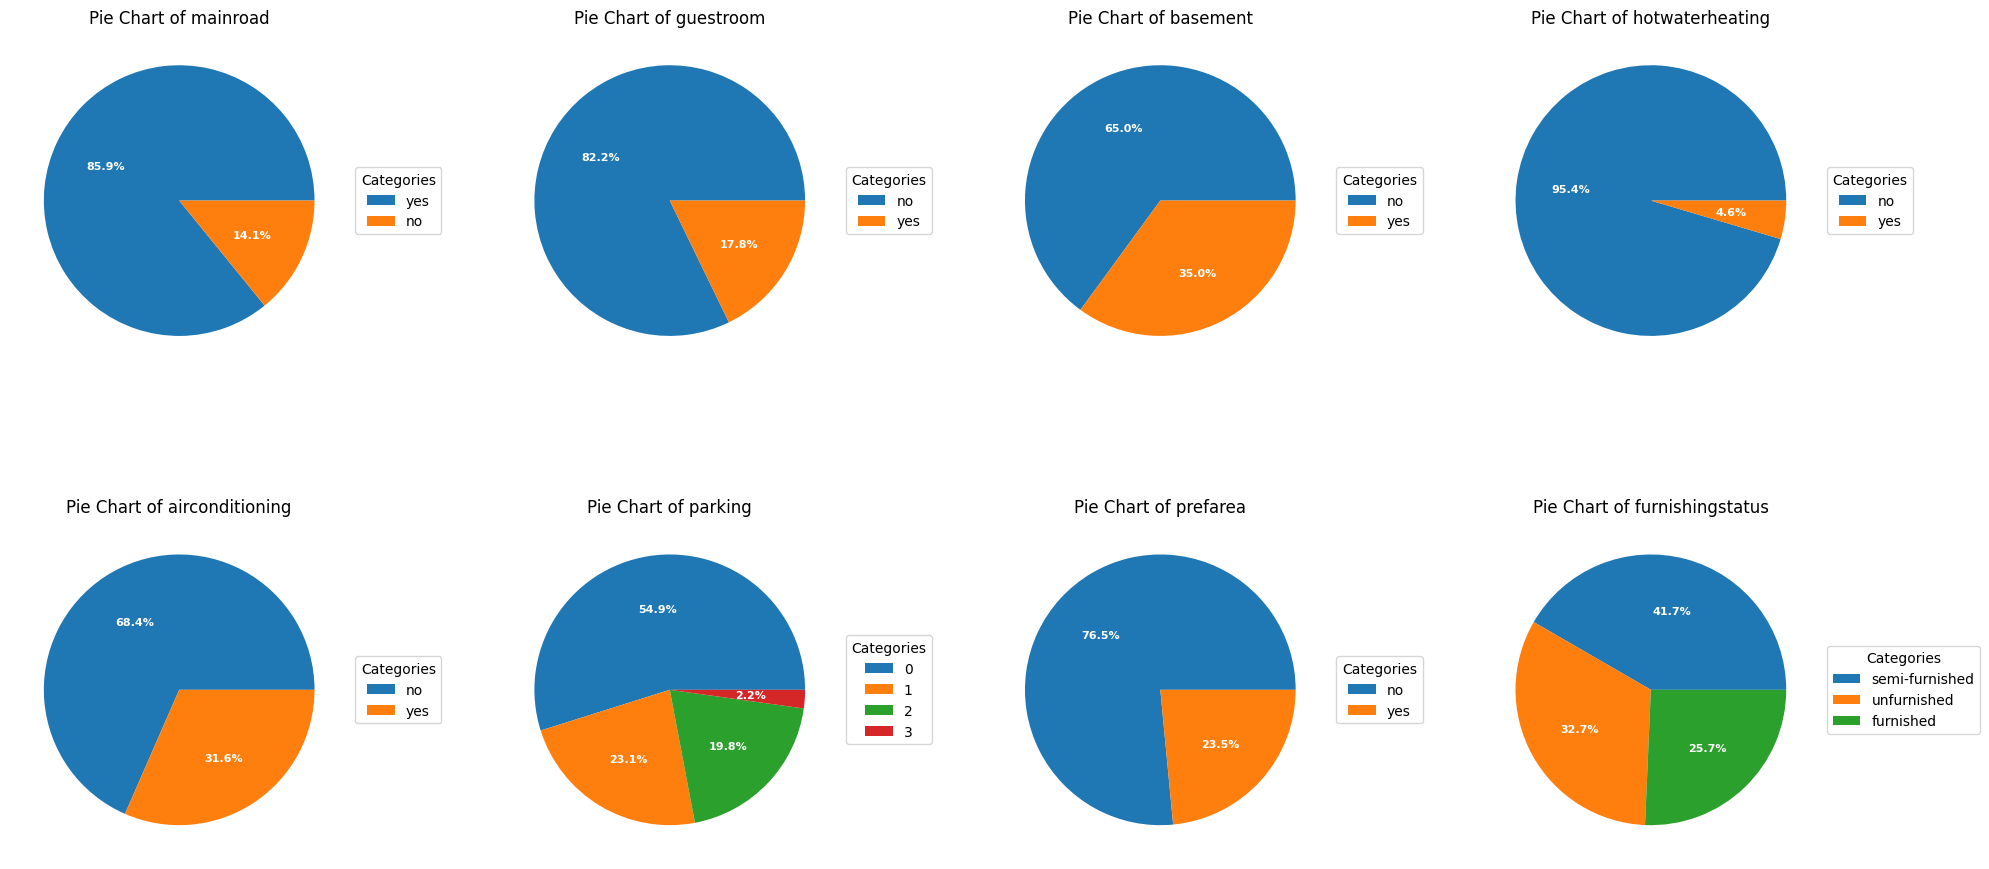

In [11]:
cat_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, var in enumerate(cat_vars):
    # Determine the position of the subplot
    row = i // 4
    col = i % 4

    # Count the frequency of different categories in the variable
    freq = og_df[var].value_counts()

    # Create pie chart in the subplot
    wedges, texts, autotexts = axs[row, col].pie(freq, labels=freq.index, autopct='%1.1f%%', textprops=dict(color="white"))

    axs[row, col].legend(wedges, freq.index,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")

    axs[row, col].set_title(f'Pie Chart of {var}')

plt.tight_layout()

### **Insights from the above chart.**

- **Main Road:** 85.9% of properties have access to a main road, while 14.1% do not.
- **Guest Room:** 82.2% of properties do not have a guest room, while 17.8% do.
- **Basement:** 65.0% of properties do not have a basement, while 35.0% do.
- **Hot Water Heating:** 95.4% of properties do not have hot water heating, while 4.6% do.
- **Air Conditioning:** 68.4% of properties do not have air conditioning, while 31.6% do.
- **Parking:** 54.9% of properties have no parking space, 23.1% have 1 space, 19.8% have 2 spaces, and 2.2% have 3 spaces.
- **Preferred Area:** 76.5% of properties are not in a preferred area, while 23.5% are.
- **Furnishing Status:** 41.7% of properties are semi-furnished, 32.7% are unfurnished, and 25.7% are furnished.


### **Visualization of Numerical Variables using Scatter Plots.**

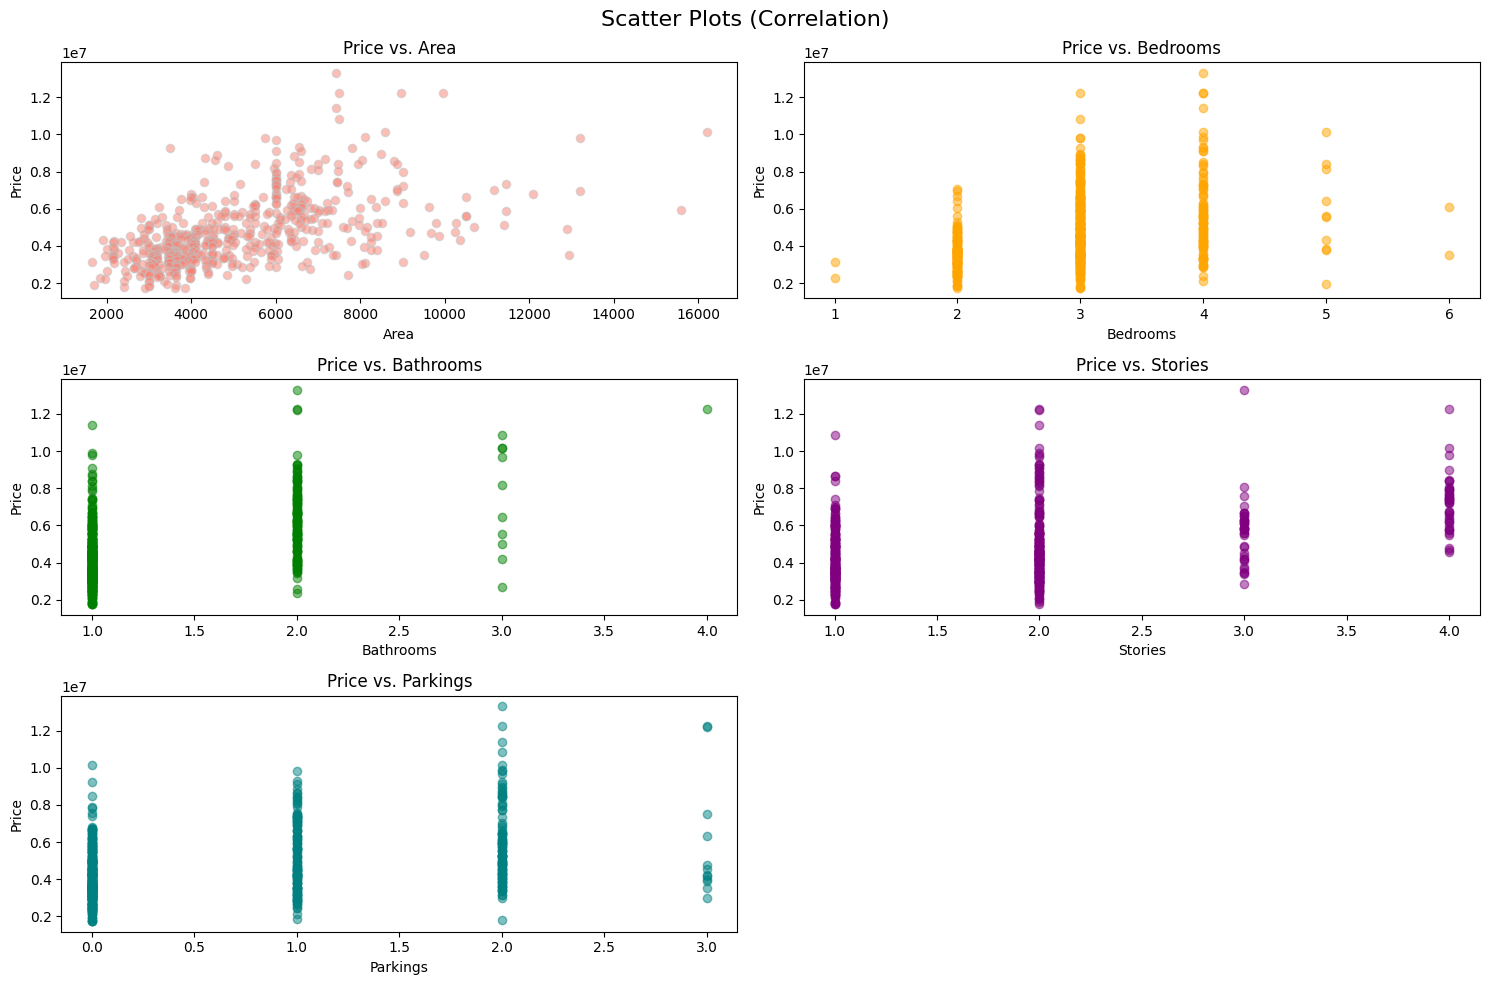

In [12]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, axes6)) = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
fig.suptitle('Scatter Plots (Correlation)', fontsize=16)

ax1.scatter(og_df['area'], og_df['price'], color='salmon', alpha=0.5, edgecolor='silver')
ax1.set_title('Price vs. Area')
ax1.set_xlabel('Area')
ax1.set_ylabel('Price')

ax2.scatter(og_df['bedrooms'], og_df['price'], color='orange', alpha=0.5, edgecolor=None)
ax2.set_title('Price vs. Bedrooms')
ax2.set_xlabel('Bedrooms')
ax2.set_ylabel('Price')

ax3.scatter(og_df['bathrooms'], og_df['price'], color='green', alpha=0.5, edgecolor=None)
ax3.set_title('Price vs. Bathrooms')
ax3.set_xlabel('Bathrooms')
ax3.set_ylabel('Price')

ax4.scatter(og_df['stories'], og_df['price'], color='purple', alpha=0.5, edgecolor=None)
ax4.set_title('Price vs. Stories')
ax4.set_xlabel('Stories')
ax4.set_ylabel('Price')

ax5.scatter(og_df['parking'], og_df['price'], color='teal', alpha=0.5, edgecolor=None)
ax5.set_title('Price vs. Parkings')
ax5.set_xlabel('Parkings')
ax5.set_ylabel('Price')

plt.delaxes(axes6)
plt.tight_layout()

### **Insight**
- **The scatter plot of price versus area shows a significant concentration of data points in the area range of 2000 to just over 4000, and in the price range of 1.75 million to 6 million (0.4 to 0.6 on a scale where the full range is 1.75 million to 13.3 million). This suggests that properties within this specific area size are likely to be priced within this particular range. This pattern could indicate a potential correlation between property size and price within these ranges.**

## **Correlational Analysis**

- 0.00 to 0.19: Very weak correlation
- 0.20 to 0.39: Weak correlation
- 0.40 to 0.59: Moderate correlation
- 0.60 to 0.79: Strong correlation
- 0.80 to 1.00: Very strong correlation

In [13]:
correlation_matrix = og_df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']].corr()
correlation_matrix

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


## **Insights from Correlation Analysis**

1. **Area and Price:** 
    - Properties with larger square footage tend to have higher prices, supported by a moderate positive correlation of 0.535.

2. **Bathrooms and Price** 
    - There is a moderate positive correlation (0.517) between the number of bathrooms and property prices, indicating that properties with more bathrooms tend to be priced higher.

3. **Stories and Price**
    - Properties with more stories also command higher prices, as indicated by a moderate positive correlation of 0.420.

4. **Bedrooms and Price** 
    - The correlation between the number of bedrooms and property prices is relatively lower(weak correlation) (0.366), suggesting that the number of bedrooms is less influential in determining prices compared to other factors.

5. **Number of Parking Spaces and Price**
    - While properties with more parking spaces tend to be priced higher, the   correlation (0.384) is weak, indicating that the number of parking spaces is not as influential as area or bathrooms.

6. **Area and Other Features**
    - Area shows very weak to weak correlations with the number of bedrooms, bathrooms, and parking availability, suggesting that larger properties tend to have more of these features, but the relationships are not extremely strong.

7. **Bedrooms and Bathrooms**
    - The correlation between the number of bedrooms and bathrooms is weak (0.373), aligning with the expectation that properties with more bedrooms generally feature more bathrooms.

8. **Stories and No. of Parking spaces**
    - The correlation between the number of stories and parking availability is very weak (0.045), suggesting that the number of stories in a property does not significantly affect parking availability.

Overall, this analysis highlights the relative importance of different property features in determining prices, with area being the most strongly correlated factor, followed by bathrooms, stories, and parking availability. The number of bedrooms appears to have a relatively weaker association with prices compared to these other factors.


### **Visualization of Correlation Matrix**

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

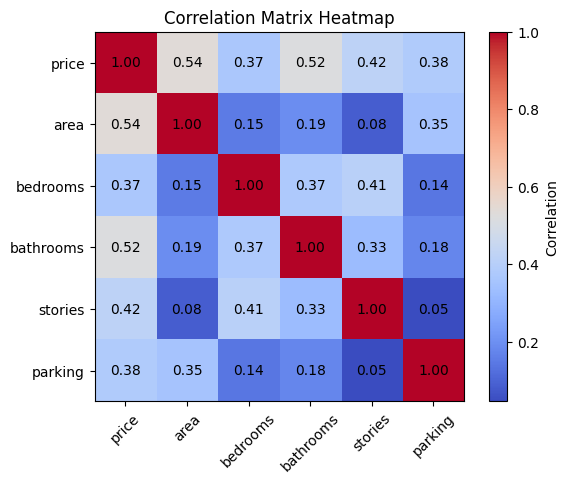

In [14]:
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, '{:.2f}'.format(correlation_matrix.iloc[i, j]), ha='center', va='center', color='black')
plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix Heatmap')

In [15]:
og_df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']].head(3)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished


## **Spearman rank correlation analysis**
- Done using numerical variables 

In [16]:
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for column in numerical_columns:
    price = og_df['price']
    variable = og_df[column]
    correlation, p_value = spearmanr(price, variable)
    print(f"Spearman Rank Correlation between Price and {column.capitalize()}: {correlation:.3f}")
    print("Correlation:", correlation)
    print("P-value:", p_value)
    print()

Spearman Rank Correlation between Price and Area: 0.603
Correlation: 0.602858858318821
P-value: 3.1285544686153554e-55

Spearman Rank Correlation between Price and Bedrooms: 0.390
Correlation: 0.39045378624237764
P-value: 2.7211701154814046e-21

Spearman Rank Correlation between Price and Bathrooms: 0.480
Correlation: 0.47991170895175245
P-value: 9.649458606186534e-33

Spearman Rank Correlation between Price and Stories: 0.363
Correlation: 0.3628564493825432
P-value: 2.104408640849231e-18

Spearman Rank Correlation between Price and Parking: 0.365
Correlation: 0.36537166939425464
P-value: 1.178219333863125e-18



## **Insights from Spearman rank correlation analysis.**
**Area vs Price**
- There is a strong positive correlation (0.602) between the price of properties and their area, indicating that larger properties tend to have higher prices.

**Bedrooms vs Price**
- The number of bedrooms exhibits a weak positive correlation (0.390) with property prices, indicating a tendency for properties with more bedrooms to be priced higher, although the relationship is not very strong.

**Bathrooms vs Price**
- Similarly, the number of bathrooms exhibits a moderate positive correlation (0.480) with property prices, indicating that properties with more bathrooms tend to have higher prices.

**Stories vs Price**
- The number of stories in a property shows a weaker positive correlation (0.363) with prices compared to area, bedrooms, and bathrooms.

**No. of Parking spaces vs Price**
- Parking availability also demonstrates a weak positive correlation (0.365) with property prices.

### **Combined Insights**:
- Both analyses confirm positive associations between price and various property features, such as area, bathrooms, and stories.
- The Spearman rank correlation analysis provides additional insights by capturing non-linear relationships between variables.
- Strong Spearman correlations and significant p-values suggest robust relationships between price and property features, enhancing our understanding of the factors influencing property prices.

## **Understanding the Impact of Categorical Variables on Property Prices: Conducting T-tests**

### Verifying the assumptions of a t-test:
1. The dependent variable should be continuous. **(confirmed)** 
2. The independent variable should be categorical with two levels/groups. **(validated)**
3. There should be independence of observations. **(Inconclusive)**
4. The dependent variable should approximately follow a normal distribution. **(violated but remedied through transformation)**
5. There should be homogeneity of variances (equal variances) between the two  groups. **(some are violated, but due to time constraints, a decision was made to proceed without further adjustments)** 

**The status of the independence of observations was deemed inconclusive due to the inherent challenges in verifying this assumption directly from the data. Without specific information on the data collection process ensuring that each observation is generated without influence from others, a definitive conclusion cannot be drawn.**

### **Verifying T test normal distribution assumption**

Text(0.5, 0, 'Prices')

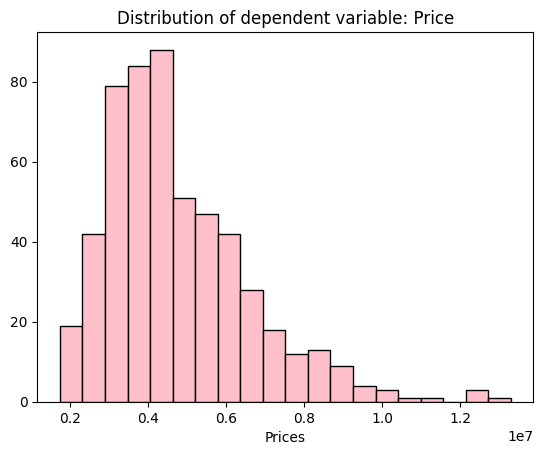

In [17]:
plt.hist(df_copy['price'], bins=20, color='pink', edgecolor='black')
plt.title('Distribution of dependent variable: Price')
plt.xlabel('Prices')

- #### **Dependent variable price is not normally distributed it is right skewed.**

### **Applying Transformations**

- **Log transformation**

In [18]:
df_copy['transformed_price_log'] = np.log(df_copy['price'])
df_copy['transformed_price_log']

0      16.403275
1      16.321036
2      16.321036
3      16.318175
4      16.250001
         ...    
540    14.414347
541    14.384879
542    14.375126
543    14.375126
544    14.375126
Name: transformed_price_log, Length: 545, dtype: float64

- **Sqrt transformation**

In [19]:
df_copy['transformed_price_sqrt'] = np.sqrt(df_copy['price'])
df_copy['transformed_price_sqrt']

0      3646.916506
1      3500.000000
2      3500.000000
3      3494.996423
4      3377.869151
          ...     
540    1349.073756
541    1329.341942
542    1322.875656
543    1322.875656
544    1322.875656
Name: transformed_price_sqrt, Length: 545, dtype: float64

- **Inverse transformation**

In [20]:
df_copy['transformed_price_inverse'] = x_inv = 1 / df_copy['price']
df_copy['transformed_price_inverse']

0      7.518797e-08
1      8.163265e-08
2      8.163265e-08
3      8.186656e-08
4      8.764242e-08
           ...     
540    5.494505e-07
541    5.658829e-07
542    5.714286e-07
543    5.714286e-07
544    5.714286e-07
Name: transformed_price_inverse, Length: 545, dtype: float64

- **Boxcox transformation**

In [21]:
df_copy['transformed_price_boxcox'], lambda_value_boxcox =boxcox(df_copy['price'])
df_copy['transformed_price_boxcox']

0      6.611014
1      6.601930
2      6.601930
3      6.601612
4      6.594002
         ...   
540    6.360480
541    6.356241
542    6.354834
543    6.354834
544    6.354834
Name: transformed_price_boxcox, Length: 545, dtype: float64

In [22]:
lambda_value_boxcox

-0.13464661287601734

## **Visuliazations of Distributions after Transformations**

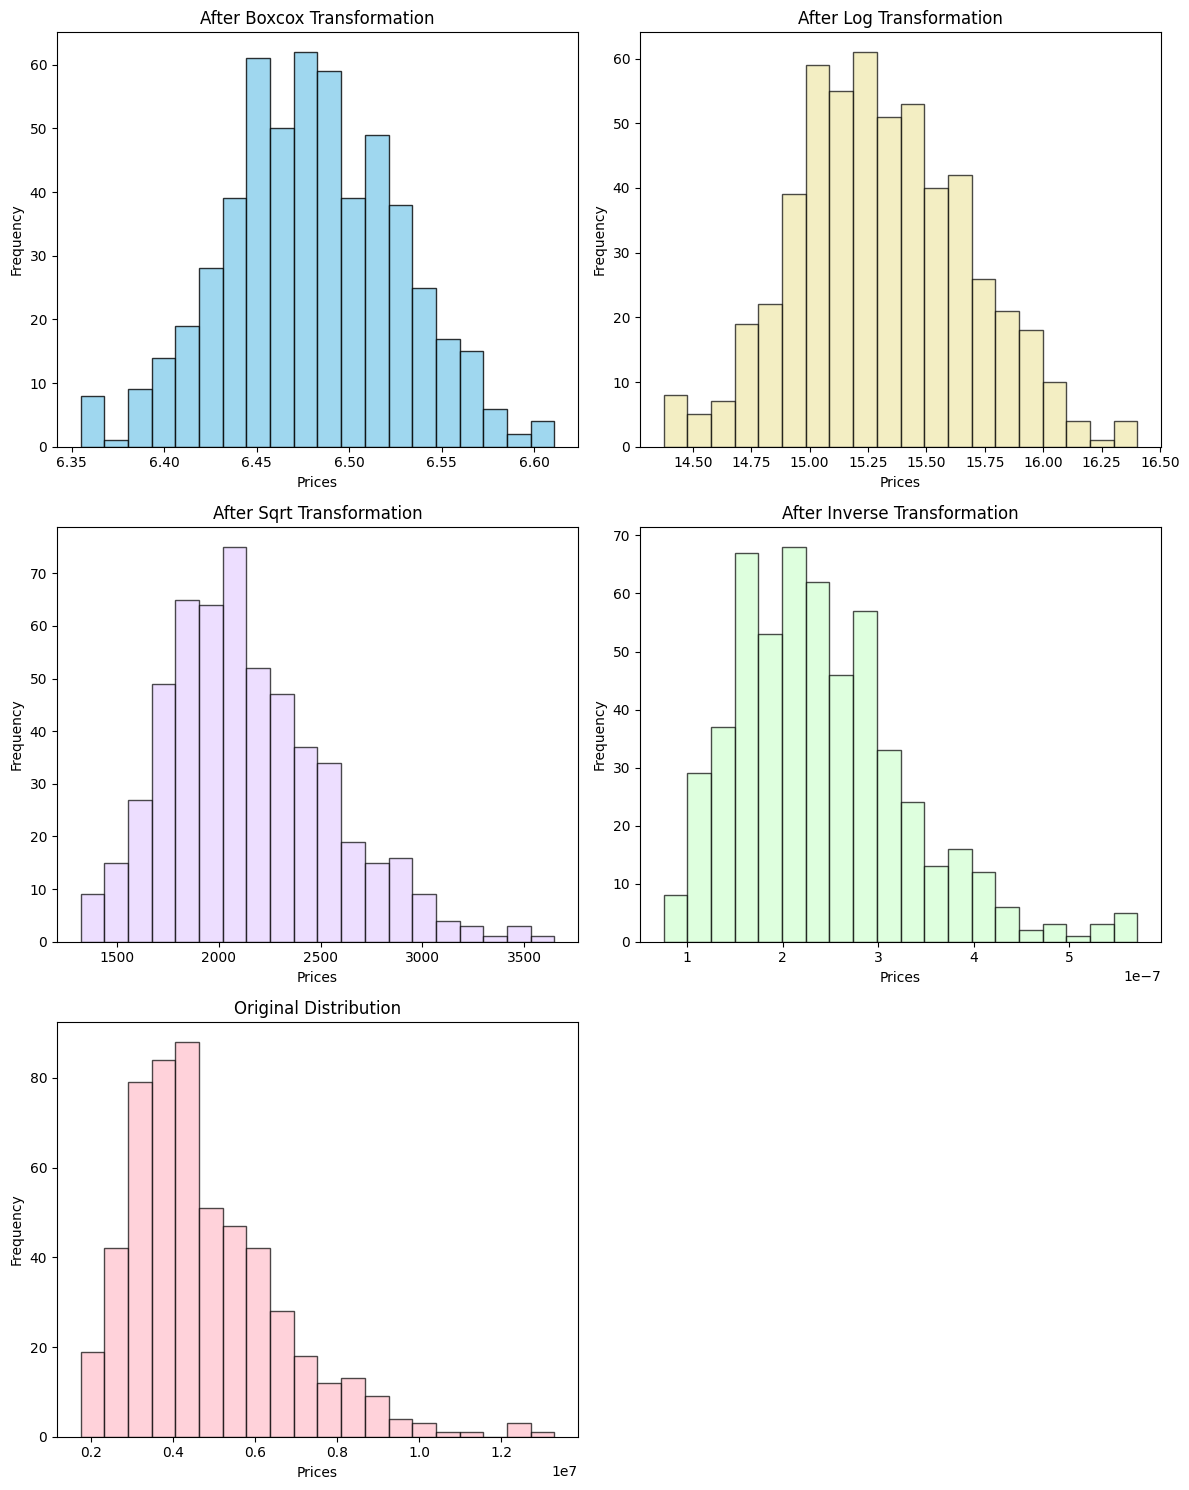

In [23]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

axs[0, 0].hist(df_copy['transformed_price_boxcox'], bins=20, color='skyblue', edgecolor='black', alpha=0.8)
axs[0, 0].set_title('After Boxcox Transformation')
axs[0, 0].set_xlabel('Prices')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(df_copy['transformed_price_log'], bins=20, color='#EEE8AA', edgecolor='black', alpha=0.7)
axs[0, 1].set_title('After Log Transformation')
axs[0, 1].set_xlabel('Prices')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist(df_copy['transformed_price_sqrt'], bins=20, color='#E6D1FF', edgecolor='black', alpha=0.7)
axs[1, 0].set_title('After Sqrt Transformation')
axs[1, 0].set_xlabel('Prices')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(df_copy['transformed_price_inverse'], bins=20, color='#D1FFD1', edgecolor='black', alpha=0.7)
axs[1, 1].set_title('After Inverse Transformation')
axs[1, 1].set_xlabel('Prices')
axs[1, 1].set_ylabel('Frequency')

axs[2, 0].hist(df_copy['price'], bins=20, color='pink', edgecolor='black', alpha=0.7)
axs[2, 0].set_title('Original Distribution')
axs[2, 0].set_xlabel('Prices')
axs[2, 0].set_ylabel('Frequency')

fig.delaxes(axs[2, 1])

plt.tight_layout()

### **Rationale for performing Shapiro-Wilk Test**

- Despite the visualizations indicating that some distributions are not normally distributed, the Shapiro-Wilk test was still performed. This decision was primarily driven by the need to compare the Box-Cox and log transformations, which visually appeared to be more similar to a normal distribution than the others.

In [24]:
def perform_shapiro_test(df, column_name, alpha=0.05):
    shapiro_test = shapiro(df[column_name])
    print(f"Null Hypothesis: {column_name} are normally distributed")
    print(f"Alternative Hypothesis: {column_name} are not normally distributed")
    print(f"Shapiro test statistic for {column_name}: {shapiro_test[0]}, p-value: {shapiro_test[1]}")
    if shapiro_test[1] < alpha:
        print("The null hypothesis is rejected at alpha={},\nSuggesting the {} datapoints are not normally distributed.\n".format(alpha, column_name))
    else:
        print("The null hypothesis cannot be rejected at alpha={},\nSuggesting the {} datapoints are normally distributed.\n".format(alpha, column_name))

perform_shapiro_test(df_copy, 'transformed_price_log')
perform_shapiro_test(df_copy, 'transformed_price_boxcox')

Null Hypothesis: transformed_price_log are normally distributed
Alternative Hypothesis: transformed_price_log are not normally distributed
Shapiro test statistic for transformed_price_log: 0.9961683031748979, p-value: 0.21183609067122433
The null hypothesis cannot be rejected at alpha=0.05,
Suggesting the transformed_price_log datapoints are normally distributed.

Null Hypothesis: transformed_price_boxcox are normally distributed
Alternative Hypothesis: transformed_price_boxcox are not normally distributed
Shapiro test statistic for transformed_price_boxcox: 0.9972610893374988, p-value: 0.5040436139793585
The null hypothesis cannot be rejected at alpha=0.05,
Suggesting the transformed_price_boxcox datapoints are normally distributed.



### **Insights based on the Shapiro-Wilk test results**

- **For the log-transformed price, the test statistic is 0.9961 and the p-value is 0.2118. Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis. This suggests that the log-transformed price data points are normally distributed.**

- **For the Box-Cox transformed price, the test statistic is 0.9972 and the p-value is 0.5040. Similar to the log-transformed price, we fail to reject the null hypothesis as the p-value is greater than 0.05. This indicates that the Box-Cox transformed price data points are also normally distributed.**

- **In conclusion, both transformations appear to normalize the price data effectively. However, the Box-Cox transformation achieves a slightly higher test statistic, suggesting it may be a more suitable choice for analyses assuming normality.**

## **Note**

- **In the conducted analysis, the Shapiro-Wilk test was employed as an initial step to compare the normality of the log and Box-Cox transformations. It’s important to acknowledge that this test comes with certain assumptions, which, if violated, could impact the validity of the results. Therefore, the outcomes of the Shapiro-Wilk test should be interpreted with due caution.**

- **To supplement the Shapiro-Wilk test, Q-Q plots were also constructed, offering a visual inspection of normality. This combined approach aims to provide a more comprehensive understanding of the data’s distribution.**

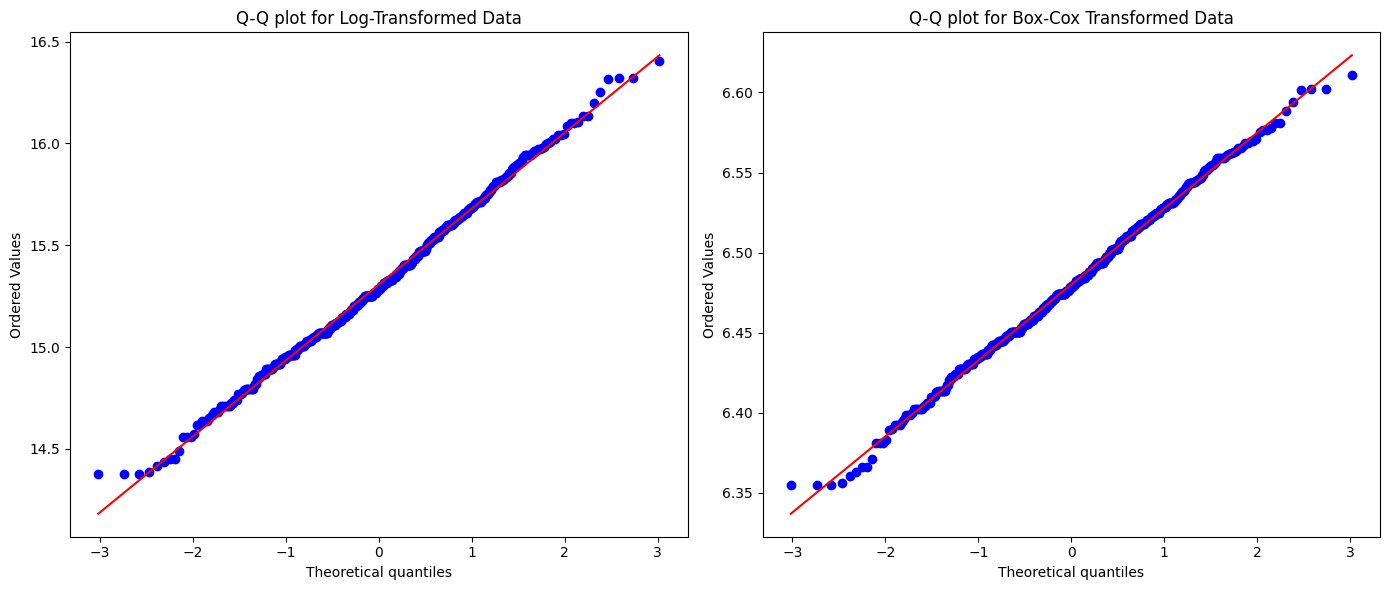

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Q-Q plot for log-transformed data
probplot(df_copy['transformed_price_log'], dist="norm", plot=axs[0])
axs[0].set_title("Q-Q plot for Log-Transformed Data")

# Q-Q plot for Box-Cox transformed data
probplot(df_copy['transformed_price_boxcox'], dist="norm", plot=axs[1])
axs[1].set_title("Q-Q plot for Box-Cox Transformed Data")

plt.tight_layout()

- **Upon careful consideration of the Shapiro-Wilk test results and analysis of the Q-Q plots, the Box-Cox transformation was selected for further analysis. This decision was based on its superior alignment with the assumptions of normality compared to the log transformation.**

### **Verifying the Homogeneity of Variances Assumption using Levene Test**

#### **Verifying Assumptions of Levene test**
- Independence of Observations **(Inconclusive)**
- Quantitative Test Variable this means that the data you’re testing should be something you can measure in numbers (dependent variable) **(confirmed)**
- Approximate Normality meaning the data within each group should be approximately normally distributed. Levene's test is robust to minor departures from normality, but severe non-normality can affect the validity of the test. **(in the context of independent sample t test)** **(violated)**

In [26]:
def plot_distribution(df, cat_var, cont_var):
    categories = df[cat_var].unique()

    for category in categories:
        cont_data = df[df[cat_var] == category][cont_var]

        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.hist(cont_data, bins=30, alpha=0.7, edgecolor='black')
        plt.title(f'{cont_var} Distribution for {cat_var} = {category}')
        plt.xlabel('Prices')

        plt.subplot(1, 2, 2)
        probplot(cont_data, dist="norm", plot=plt)
        plt.title(f'Q-Q Plot for {cat_var} = {category}')
        plt.tight_layout()

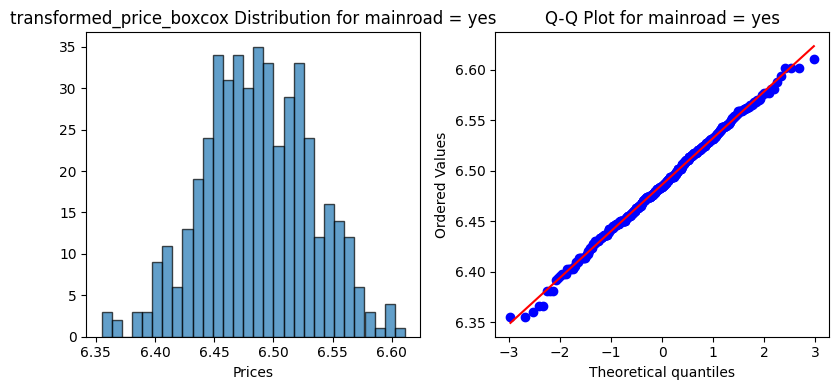

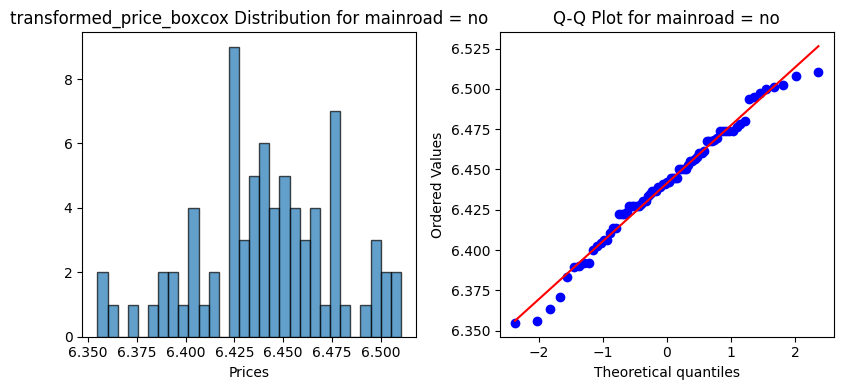

In [27]:
plot_distribution(df_copy, 'mainroad', 'transformed_price_boxcox')

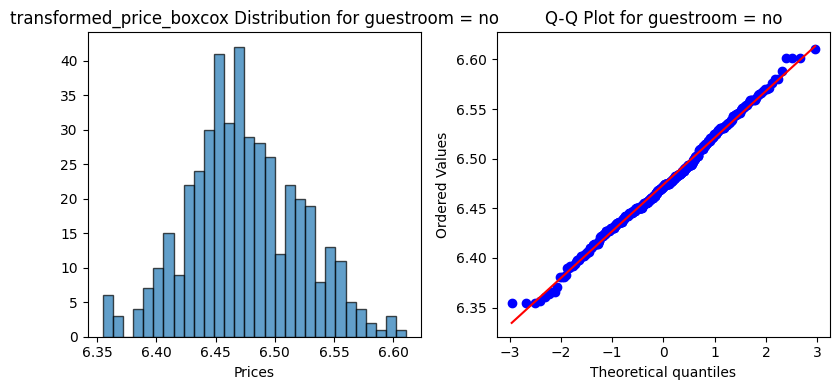

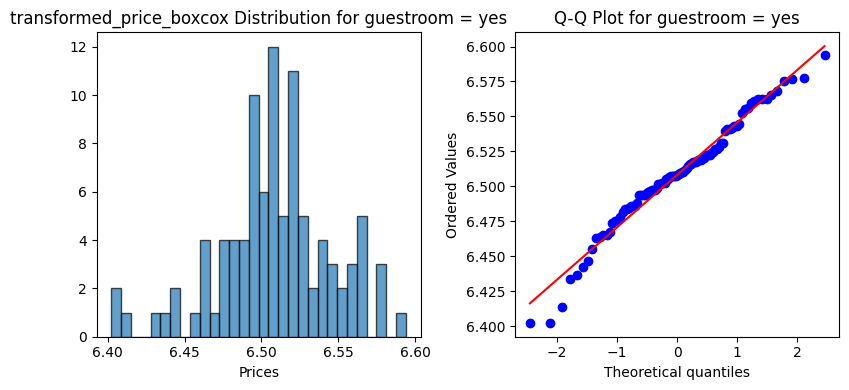

In [28]:
plot_distribution(df_copy, 'guestroom', 'transformed_price_boxcox')

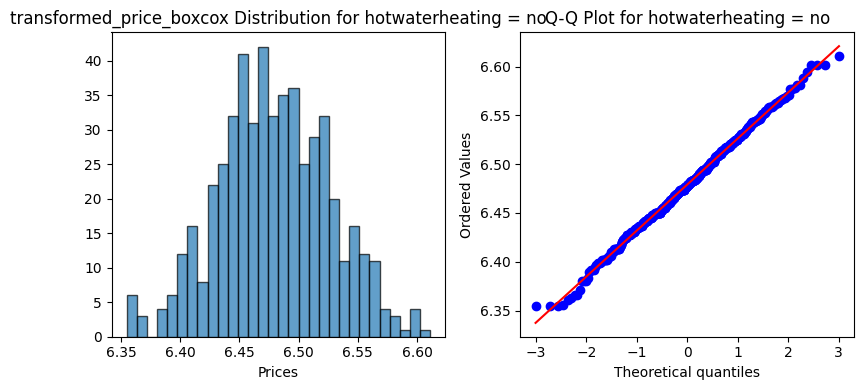

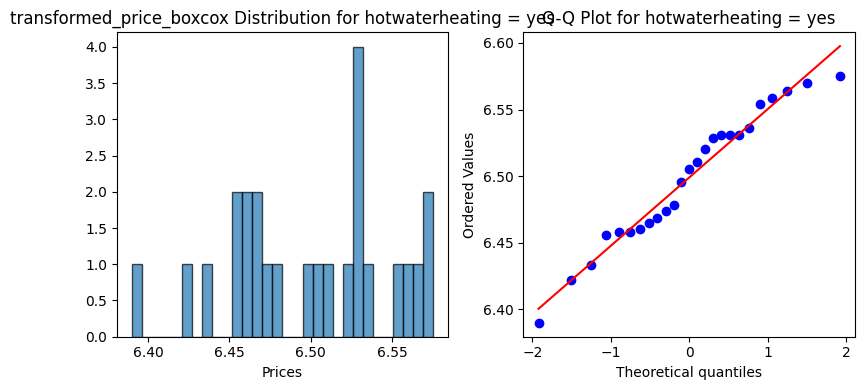

In [29]:
plot_distribution(df_copy, 'hotwaterheating', 'transformed_price_boxcox')

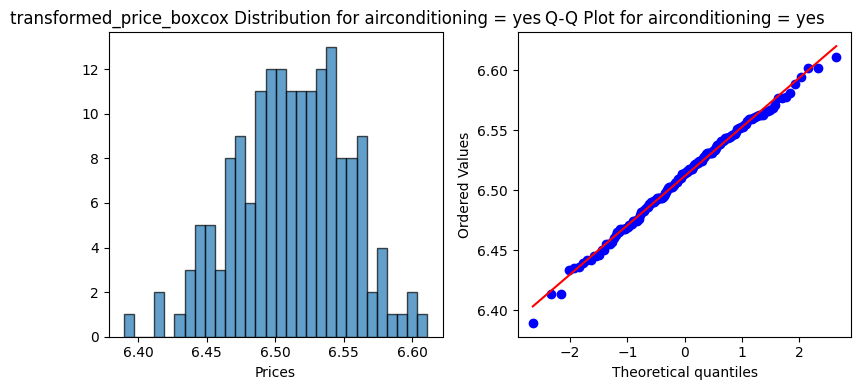

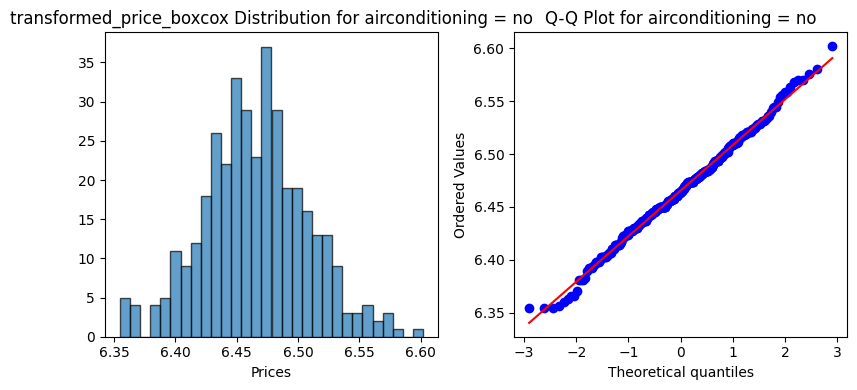

In [30]:
plot_distribution(df_copy, 'airconditioning', 'transformed_price_boxcox')

### **Note**

- **During the analysis, it was noted that the data did not entirely conform to the normality assumption required for Levene’s test. Other statistical tests were also explored, but their assumptions too were not fully met by the data.**

- **Despite these limitations, the decision was made to continue with Levene’s test, recognizing its relative robustness to deviations from normality. This decision is acknowledged as a limitation in the current analysis.**

In [31]:
group1_mainroad_yes = df_copy[df_copy['mainroad'] == 'yes']['transformed_price_boxcox']
group2_mainroad_no = df_copy[df_copy['mainroad'] == 'no']['transformed_price_boxcox']

statistic, p_value = levene(group1_mainroad_yes, group2_mainroad_no)

print(f"Levene's Test Statistic: {statistic}")
print(f"Levene's Test p-value: {p_value}")

if p_value < 0.05:
    print("Variances are not equal for the two groups of mainroad category")
else:
    print("Variances are equal for the two groups of mainroad category")

Levene's Test Statistic: 7.488066900200783
Levene's Test p-value: 0.006414288894822126
Variances are not equal for the two groups of mainroad category


In [32]:
group1_guestroom_yes = df_copy[df_copy['guestroom'] == 'yes']['transformed_price_boxcox']
group2_guestroom_no = df_copy[df_copy['guestroom'] == 'no']['transformed_price_boxcox']

statistic, p_value = levene(group1_guestroom_yes, group2_guestroom_no)

print(f"Levene's Test Statistic: {statistic}")
print(f"Levene's Test p-value: {p_value}")

if p_value < 0.05:
    print("Variances are not equal for the two groups guestroom category")
else:
    print("Variances are equal for the two groups guestroom category")

Levene's Test Statistic: 8.441984231151283
Levene's Test p-value: 0.0038160567667358727
Variances are not equal for the two groups guestroom category


In [33]:
group1_guestroom_yes = df_copy[df_copy['hotwaterheating'] == 'yes']['transformed_price_boxcox']
group2_guestroom_no = df_copy[df_copy['hotwaterheating'] == 'no']['transformed_price_boxcox']

statistic, p_value = levene(group1_guestroom_yes, group2_guestroom_no)

print(f"Levene's Test Statistic: {statistic}")
print(f"Levene's Test p-value: {p_value}")

if p_value < 0.05:
    print("Variances are not equal for the two groups hotwaterheating category")
else:
    print("Variances are equal for the two groups hotwaterheating category")

Levene's Test Statistic: 0.6161708495657318
Levene's Test p-value: 0.4328161275009871
Variances are equal for the two groups hotwaterheating category


In [34]:
group1_airconditioning_yes = df_copy[df_copy['airconditioning'] == 'yes']['transformed_price_boxcox']
group2_airconditioning_no = df_copy[df_copy['airconditioning'] == 'no']['transformed_price_boxcox']

statistic, p_value = levene(group1_airconditioning_yes, group2_airconditioning_no)

print(f"Levene's Test Statistic: {statistic}")
print(f"Levene's Test p-value: {p_value}")

if p_value < 0.05:
    print("Variances are not equal for the two groups airconditioning category")
else:
    print("Variances are equal for the two groups airconditioning category")

Levene's Test Statistic: 0.24430881012004418
Levene's Test p-value: 0.6213111353288387
Variances are equal for the two groups airconditioning category


In [35]:
group1_prefarea_yes = df_copy[df_copy['prefarea'] == 'yes']['transformed_price_boxcox']
group2_prefarea_no = df_copy[df_copy['prefarea'] == 'no']['transformed_price_boxcox']

statistic, p_value = levene(group1_prefarea_yes, group2_prefarea_no)

print(f"Levene's Test Statistic: {statistic}")
print(f"Levene's Test p-value: {p_value}")

if p_value < 0.05:
    print("Variances are not equal for the two groups prefarea category")
else:
    print("Variances are equal for the two groups prefarea category")

Levene's Test Statistic: 4.697210563457701
Levene's Test p-value: 0.03064555465435774
Variances are not equal for the two groups prefarea category


### **Note**
- **While the Levene’s test was performed to assess the equality of variances, it’s important to acknowledge that the assumption of independence of observations may not have been fully met. This is due to the lack of information on how the data was collected. If the observations are not independent, it could impact the validity of the test results. Therefore, the results of the Levene’s test should be interpreted with caution.**

### **Visualization of Equal Variances Assumption using Box plots and Scatter plots**

C:\Users\Bhushan\AppData\Local\Temp\ipykernel_2240\3565266520.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=labels)


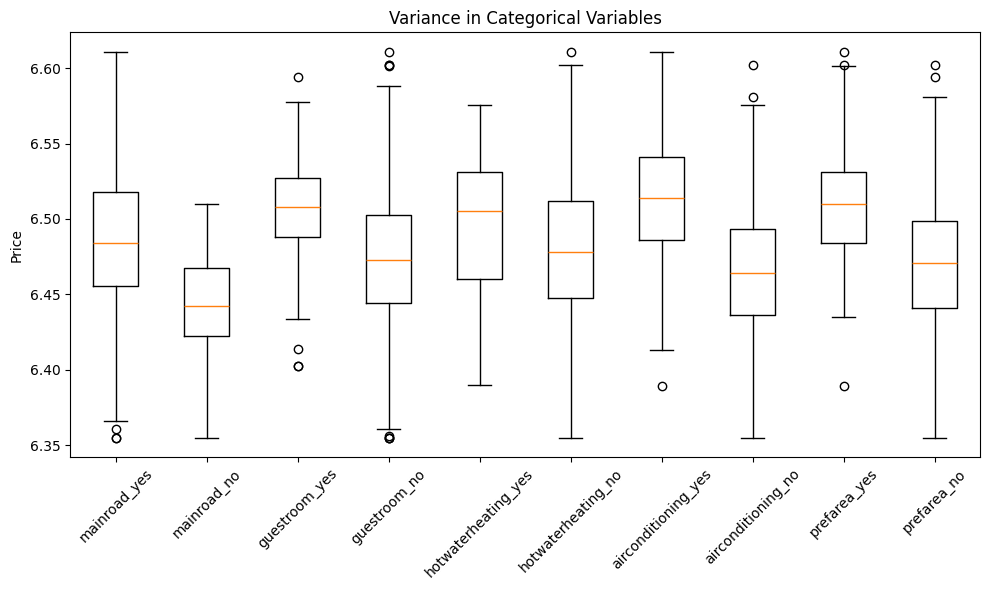

In [36]:
cat_vars = ['mainroad', 'guestroom', 'hotwaterheating', 'airconditioning', 'prefarea']

fig, ax = plt.subplots(figsize=(10, 6))

data = []
labels = []

for var in cat_vars:
    yes_prices = df_copy[df_copy[var] == 'yes']['transformed_price_boxcox']
    no_prices = df_copy[df_copy[var] == 'no']['transformed_price_boxcox']
    data.append(yes_prices)
    data.append(no_prices)
    labels.append(f"{var}_yes")
    labels.append(f"{var}_no")

ax.boxplot(data, labels=labels)
ax.set_title('Variance in Categorical Variables')
ax.set_ylabel('Price')
plt.xticks(rotation=45)

plt.tight_layout()

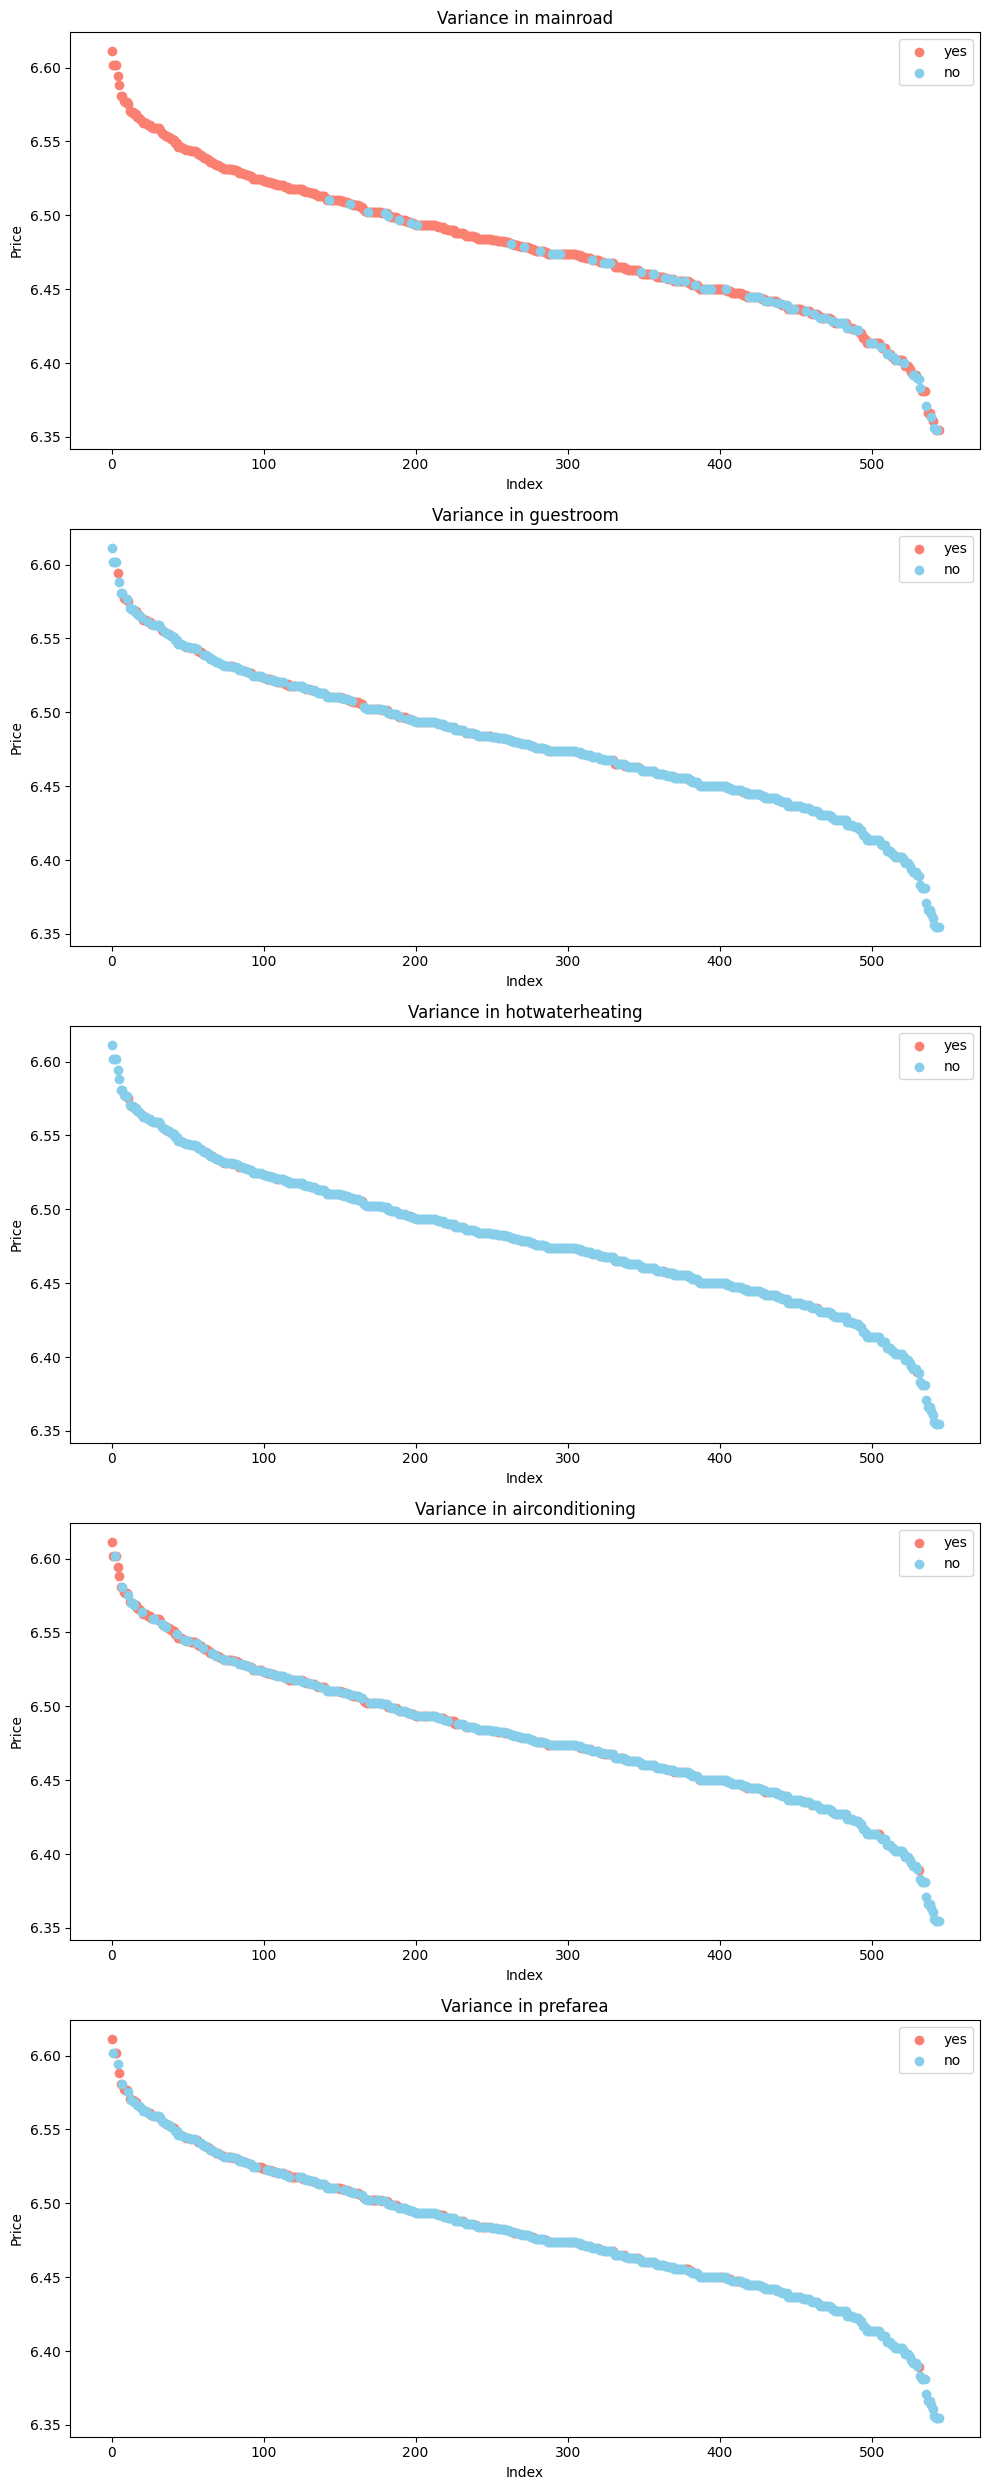

In [37]:
cat_vars = ['mainroad', 'guestroom', 'hotwaterheating', 'airconditioning', 'prefarea']

fig, axs = plt.subplots(len(cat_vars), figsize=(10, 5*len(cat_vars)))

for i, var in enumerate(cat_vars):
    group1 = df_copy[df_copy[var] == 'yes']['transformed_price_boxcox']
    group2 = df_copy[df_copy[var] == 'no']['transformed_price_boxcox']

    ax = axs[i]
    ax.scatter(group1.index, group1, color='salmon', label='yes')
    ax.scatter(group2.index, group2, color='skyblue', label='no')

    ax.set_title(f'Variance in {var}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Price')
    ax.legend()

plt.tight_layout()

## **Insight**
- Based on the Levene’s test results, the assumption of equal variances is met for the ‘hotwaterheating’ and ‘airconditioning’ categories, but not for ‘mainroad’, 'prefarea' and ‘guestroom’. This violation of homogeneity of variances for some categories suggests that the results should be interpreted with caution.

- Visual inspections through box plots and scatter plots were also conducted to complement these findings. While other tests could have been considered to address the issue of unequal variances, due to time constraints and the scope of this project, they were not pursued.

- In conclusion, while the Box-Cox transformation was chosen based on its superior alignment with normality, the violation of the equal variances assumption for some categories underscores the importance of cautious interpretation of the results.

In [38]:
group1_yes = df_copy[df_copy['mainroad'] == 'yes']['transformed_price_boxcox']
group1_no = df_copy[df_copy['mainroad'] == 'no']['transformed_price_boxcox']

group2_yes = df_copy[df_copy['guestroom'] == 'yes']['transformed_price_boxcox']
group2_no = df_copy[df_copy['guestroom'] == 'no']['transformed_price_boxcox']

group3_yes = df_copy[df_copy['hotwaterheating'] == 'yes']['transformed_price_boxcox']
group3_no = df_copy[df_copy['hotwaterheating'] == 'no']['transformed_price_boxcox']

group4_yes = df_copy[df_copy['airconditioning'] == 'yes']['transformed_price_boxcox']
group4_no = df_copy[df_copy['airconditioning'] == 'no']['transformed_price_boxcox']

group5_yes = df_copy[df_copy['prefarea'] == 'yes']['transformed_price_boxcox']
group5_no = df_copy[df_copy['prefarea'] == 'no']['transformed_price_boxcox']

t_stat1, p_value1 = ttest_ind(group1_yes, group1_no)
t_stat2, p_value2 = ttest_ind(group2_yes, group2_no)
t_stat3, p_value3 = ttest_ind(group3_yes, group3_no)
t_stat4, p_value4 = ttest_ind(group4_yes, group4_no)
t_stat5, p_value5 = ttest_ind(group5_yes, group5_no)

alpha = 0.05

def print_result(var_name, p_value):
    print(f"Variable: {var_name}")
    print("Null Hypothesis: There is no difference in prices between 'yes' and 'no' groups.")
    print("Alternative Hypothesis: There is a difference in prices between 'yes' and 'no' groups.")
    print(f"P-value: {p_value:.6f}")  # Format p-value to 6 decimal places
    if p_value < alpha:
        print("Result: Reject null hypothesis (There is a significant difference).")
    else:
        print("Result: Fail to reject null hypothesis (There is no significant difference).")
    print()

print_result("Mainroad", p_value1,)
print_result("Guestroom", p_value2)
print_result("Hotwaterheating", p_value3)
print_result("Airconditioning", p_value4)
print_result("Prefarea", p_value5)

Variable: Mainroad
Null Hypothesis: There is no difference in prices between 'yes' and 'no' groups.
Alternative Hypothesis: There is a difference in prices between 'yes' and 'no' groups.
P-value: 0.000000
Result: Reject null hypothesis (There is a significant difference).

Variable: Guestroom
Null Hypothesis: There is no difference in prices between 'yes' and 'no' groups.
Alternative Hypothesis: There is a difference in prices between 'yes' and 'no' groups.
P-value: 0.000000
Result: Reject null hypothesis (There is a significant difference).

Variable: Hotwaterheating
Null Hypothesis: There is no difference in prices between 'yes' and 'no' groups.
Alternative Hypothesis: There is a difference in prices between 'yes' and 'no' groups.
P-value: 0.040487
Result: Reject null hypothesis (There is a significant difference).

Variable: Airconditioning
Null Hypothesis: There is no difference in prices between 'yes' and 'no' groups.
Alternative Hypothesis: There is a difference in prices between

## **T-Test Results(Insights) for Categorical Variables**

- The results of the hypothesis tests indicate significant differences in prices across all examined categories (‘Mainroad’, ‘Guestroom’, ‘Hotwaterheating’, ‘Airconditioning’, ‘Prefarea’). For each category, the null hypothesis of no significant difference in prices between the ‘yes’ and ‘no’ groups was rejected.

- This suggests that these features significantly influence property prices. Therefore, properties with these features (‘yes’ group) are likely to have different prices compared to those without these features (‘no’ group).

- **However, these results should be interpreted with caution, considering the violation of assumptions and limitations of the tests used.**

### **Finding the Strength of Association Between Categorical Variables with Two Groups and a Continuous Dependent Variable(price) using Point-Biserial Correlation Coefficient**

#### **Rationale for Using Point-Biserial Correlation Coefficient**

- The Point-Biserial Correlation Coefficient (rpb) was chosen as the measure of association in this analysis due to its suitability for the data at hand. This measure is specifically designed for situations where one variable is continuous (in this case, the transformed price) and the other is binary (the categorical variables with two groups).

- The coefficient not only quantifies the strength of the association between the variables, but also indicates its direction. A positive coefficient suggests a positive relationship, while a negative one suggests an inverse relationship.

- Moreover, rpb is robust to non-normality, making it a reliable choice even when the continuous variable deviates from a normal distribution. This is particularly relevant given that the price variable has undergone a Box-Cox transformation.

- In summary, the Point-Biserial Correlation Coefficient provides a concise, robust, and interpretable measure of the relationship between our variables of interest.

### **Verifying the assumptions of pointbiserial test**
- Continuous and Binary (confirmed)
- Normally Distributed [dependent variable] (violated but remedied through transformation)
- No Outliers (violated)
- Equal Variances (violated for some categories)

In [39]:
df_copy_1 = df_copy.copy()
df_copy_1.head(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,transformed_price_log,transformed_price_sqrt,transformed_price_inverse,transformed_price_boxcox
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,16.403275,3646.916506,7.518797e-08,6.611014


In [40]:
from scipy.stats import pointbiserialr

cat_vars = ['mainroad', 'guestroom', 'hotwaterheating', 'airconditioning', 'prefarea']
# Define a mapping from categories to numbers
binary_mapping = {'yes': 1, 'no': 0}

# Convert the categorical variables to numeric
for var in cat_vars:
    df_copy_1[var] = df_copy_1[var].map(binary_mapping)
    
    # Calculate point-biserial correlation
    corr_coef, p_value = pointbiserialr(df_copy_1['transformed_price_boxcox'], df_copy_1[var])
    
    # Print the results
    print(f"\nPoint-biserial correlation for {var}:")
    print(f"Correlation coefficient: {corr_coef:.4f}")
    print(f"p-value: {p_value:.4f}")


Point-biserial correlation for mainroad:
Correlation coefficient: 0.3327
p-value: 0.0000

Point-biserial correlation for guestroom:
Correlation coefficient: 0.2777
p-value: 0.0000

Point-biserial correlation for hotwaterheating:
Correlation coefficient: 0.0878
p-value: 0.0405

Point-biserial correlation for airconditioning:
Correlation coefficient: 0.4526
p-value: 0.0000

Point-biserial correlation for prefarea:
Correlation coefficient: 0.3401
p-value: 0.0000


### **Insights**

- **Mainroad: There is a moderate positive correlation (0.3327) between being on the main road and the dependent variable. This suggests that properties on the main road tend to have higher values for the dependent variable.**

- **Guestroom: There is a weak positive correlation (0.2777) between having a guest room and the dependent variable. This indicates that properties with a guest room are somewhat more likely to have higher values for the dependent variable.**

- **Hotwaterheating: The correlation (0.0878) is very weak, suggesting that having hot water heating has a minimal association with the dependent variable.**

- **Airconditioning: There is a moderate-to-strong positive correlation (0.4526) between having air conditioning and the dependent variable. This suggests that properties with air conditioning tend to have higher values for the dependent variable.**

- **Prefarea: There is a moderate positive correlation (0.3401) between being in a preferred area and the dependent variable. This indicates that properties in preferred areas are likely to have higher values for the dependent variable.**


## **Rationale for Not Addressing Outliers and Equal Variances Assumption**
**In this analysis, the decision to not handle outliers and the assumption of equal variances before performing the Point-Biserial Correlation test was based on the following considerations:**

- Data Authenticity: Outliers in the data may represent genuine extreme values. Removing these could lead to an analysis that is less representative of the real-world situation. Similarly, unequal variances might reflect the true variability in the population.

- Test Robustness: The Point-Biserial Correlation Coefficient is relatively robust to the presence of outliers and unequal variances. While it’s acknowledged that the presence of outliers and unequal variances can have an impact on the results of the Point-Biserial Correlation Coefficient, it’s also important to note that these factors are just one part of a larger analytical context. Therefore, while these aspects should not be ignored, they should also not overshadow the broader insights gained from the analysis.

- Practical Constraints: Given the time constraint the focus was on conducting a meaningful analysis within this constraint.

##### **While these decisions were made in the context of this project, it’s important to note that the potential impact of outliers and unequal variances on the results was considered in the interpretation of the findings. Future analyses may benefit from more sophisticated techniques to handle these issues, given more time**

## **Investigating Associations Between Categorical Variables: Employing Chi-Square Test.**

## Verifying the Assumptions of Chi Square Test.
- Both variables are categorical (nominal or ordinal). **(validated)**
- The observations should be independent of each other. **(Inconclusive). [based on the above T test].**
- Each cell in the contingency table has an expected frequency count of at least for 5. **(for each two categorical variables being tested)**

In [41]:
df_copy[['mainroad', 'guestroom', 'hotwaterheating', 'prefarea', 'airconditioning','furnishingstatus']].head(2)

,mainroad,guestroom,hotwaterheating,prefarea,airconditioning,furnishingstatus
0,yes,no,no,yes,yes,furnished
1,yes,no,no,no,yes,furnished


In [42]:
df_copy['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [43]:
df_copy['prefarea'].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

#### **1. Investigating Association between Properties on Main Road and Preferred Areas.**

- #### **Rationale for Analysis**
1. Properties on main roads are desirable due to their accessibility and visibility, while preferred areas are sought after for their local amenities, safety, and attractiveness.
2. Investigating the relationship between these variables provides insights into how location-based factors influence property desirability. This is crucial for predictive modeling aimed at estimating property prices or understanding market trends.
3. If a significant association is found, it suggests these variables should not be treated independently in the model, improving the model’s accuracy and interpretability.
4. In conclusion, this analysis will guide decision-making in real estate investments, urban planning, and policy-making, providing a clear rationale for my investigative approach.

**Formulated a Function to Assess Association its Type and Strength Between Categorical Variables Using Chi-Square Test.**

In [44]:
def chi_square_test(df, var1, var2, alpha=0.05):
    # Create filters
    filter1 = (df[var1] == 'yes') & (df[var2] == 'yes')
    filter2 = (df[var1] == 'yes') & (df[var2] == 'no')
    filter3 = (df[var1] == 'no') & (df[var2] == 'yes')
    filter4 = (df[var1] == 'no') & (df[var2] == 'no')

    # Create contingency table
    contingency_table = np.array([
        [df.loc[filter1].shape[0], df.loc[filter2].shape[0]],
        [df.loc[filter3].shape[0], df.loc[filter4].shape[0]]
    ])

    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Check if all expected frequencies are greater than 5
    if np.all(expected >= 5):
        print("All expected frequencies are greater than 5.")
    else:
        print("Some expected frequencies are less than 5.")
        print("The Chi-Square test cannot be reliably performed.")
        return

    # Print hypotheses
    print(f"Null Hypothesis: There is no association between {var1} and {var2} (they are independent)")
    print(f"Alternative Hypothesis: There is an association between {var1} and {var2} (they are not independent)\n")

    # Print test results
    print('Degrees of freedom:', dof)
    print('Chi-square statistic:', chi2)
    print('p-value:', p)

    # Interpret p-value
    if p < alpha:
        print(f"\nResult: We reject the null hypothesis. \nThere is evidence to suggest there is an association between {var1} and {var2}.")
    else:
        print(f"\nResult: We fail to reject the null hypothesis. \nThere is not enough evidence to suggest there is an association between {var1} and {var2}.")

    # Calculate the residuals
    residuals = (contingency_table - expected) / np.sqrt(expected)

    # Print the residuals
    print("Residuals:")
    print(residuals)

    # Determine the direction of the association
    if residuals[0, 0] > 0 and residuals[1, 1] > 0:
        print(f"\nThe residuals suggest a positive association between the {var1} and {var2}.")
    elif residuals[0, 0] < 0 and residuals[1, 1] < 0:
        print(f"\nThe residuals suggest a negative association between the {var1} and {var2}.")
    else:
        print("\nThe direction of the association is mixed or unclear based on the residuals.")

    # Calculate Cramer's V for effect size
    n = np.sum(contingency_table)  # Total number of observations
    min_dim = min(contingency_table.shape) - 1  # Minimum dimension minus 1
    V = np.sqrt((chi2/n) / min_dim)

    print("\nCramer's V:", V)

- Cramer's V is a measure of the strength of association between two categorical variables. It ranges from 0 (indicating no association) to 1 (indicating a perfect association).
- If Cramer's V is close to 0, it means there is little to no association between the variables.
- If Cramer's V is close to 1, it means there is a strong association between the variables.

In [45]:
chi_square_test(og_df, 'mainroad', 'prefarea')

All expected frequencies are greater than 5.
Null Hypothesis: There is no association between mainroad and prefarea (they are independent)
Alternative Hypothesis: There is an association between mainroad and prefarea (they are not independent)

Degrees of freedom: 1
Chi-square statistic: 20.44030075548806
p-value: 6.1520545272850425e-06

Result: We reject the null hypothesis. 
There is evidence to suggest there is an association between mainroad and prefarea.
Residuals:
[[ 1.53417642 -0.84998696]
 [-3.78227296  2.09551042]]

The residuals suggest a positive association between the mainroad and prefarea.

Cramer's V: 0.1936624356990677


## **Insight**
**The Chi-Square test results reveal a significant association between properties located on Main Road and those in Preferred Areas. Residual analysis indicates a weak positive association, suggesting that properties on Main Road are more likely to be situated in Preferred Areas. The effect size, as measured by Cramer's V (0.193), indicates a weak association between the variables. This finding underscores the importance of considering location preferences when analyzing property characteristics.**

#### **2. Is there an association between properties having air conditioning and being located in preferred areas ?**

#### **Rationale for Analysis**
1. Market Understanding: This analysis can reveal if properties with central air conditioning are more prevalent in preferred areas, indicating a potential market trend or preference.

2. Model Building: If a significant association exists, it suggests these variables should not be treated independently in predictive models, improving their accuracy and interpretability.

In [46]:
chi_square_test(og_df, 'airconditioning', 'prefarea')

All expected frequencies are greater than 5.
Null Hypothesis: There is no association between airconditioning and prefarea (they are independent)
Alternative Hypothesis: There is an association between airconditioning and prefarea (they are not independent)

Degrees of freedom: 1
Chi-square statistic: 6.925327761509346
p-value: 0.0084983415876319

Result: We reject the null hypothesis. 
There is evidence to suggest there is an association between airconditioning and prefarea.
Residuals:
[[ 1.98301526 -1.09865924]
 [-1.34659149  0.7460584 ]]

The residuals suggest a positive association between the airconditioning and prefarea.

Cramer's V: 0.1127254337565994


## **Insight**
- **The chi-square test indicates a statistically significant association between properties with air conditioning and preferred areas. Residual analysis reveals a weak positive association between the presence of air conditioning and properties located in preferred areas. Understanding this association can inform real estate marketing strategies, highlighting the appeal of air-conditioned properties in preferred residential areas.**

### **3. Is the presence of a guest room associated with properties being located in preferred areas ?**

### **Rationale for Analysis**
1. This can reveal if properties with guest rooms are more likely to be in preferred areas, indicating a potential market trend.

2. The insights gained can guide strategic decisions in real estate investments and urban planning.

3. If a significant association exists, it suggests these variables should not be treated independently in predictive models, improving their accuracy.

In [47]:
chi_square_test(og_df, 'guestroom', 'prefarea')

All expected frequencies are greater than 5.
Null Hypothesis: There is no association between guestroom and prefarea (they are independent)
Alternative Hypothesis: There is an association between guestroom and prefarea (they are not independent)

Degrees of freedom: 1
Chi-square statistic: 13.134011877153458
p-value: 0.0002899831698260162

Result: We reject the null hypothesis. 
There is evidence to suggest there is an association between guestroom and prefarea.
Residuals:
[[ 2.97890434 -1.65041634]
 [-1.38612826  0.76796314]]

The residuals suggest a positive association between the guestroom and prefarea.

Cramer's V: 0.15523886227922912


## **Insight**
- **Based on the Chi-square test, we reject the null hypothesis that there is no association between the presence of a guest room and properties being located in preferred areas (p-value: 0.00028). This suggests a statistically significant association between these two variables.**

- **The residuals indicate a positive association between properties with guest rooms and those in preferred areas. This implies that properties with guest rooms are more likely to be in preferred areas.**

- **The value of Cramer’s V (0.155) suggests that the strength of this association is relatively weak.**

- **This insight can be valuable for real estate investors, urban planners, and individuals looking to buy or rent properties, as it highlights the importance of guest rooms in preferred areas. It can also inform feature selection in predictive modeling.**

### **4. Is there an association between properties having a basement and having central air conditioning ?**

### **Rationale for Analysis**
1. If an association exists, it could suggest that properties with certain amenities (like basements) are more likely to have others (like central air conditioning). This can inform feature engineering in predictive modeling.

2. This analysis can reveal trends about property features that are commonly found together, which can be valuable for real estate investors and developers.

3. If a significant association is found, it suggests these variables should not be treated independently in the model, improving its accuracy and interpretability.

In [48]:
chi_square_test(og_df, 'basement', 'airconditioning')

All expected frequencies are greater than 5.
Null Hypothesis: There is no association between basement and airconditioning (they are independent)
Alternative Hypothesis: There is an association between basement and airconditioning (they are not independent)

Degrees of freedom: 1
Chi-square statistic: 1.0172782852454134
p-value: 0.3131654786027015

Result: We fail to reject the null hypothesis. 
There is not enough evidence to suggest there is an association between basement and airconditioning.
Residuals:
[[ 0.73688031 -0.50038785]
 [-0.54126757  0.36755456]]

The residuals suggest a positive association between the basement and airconditioning.

Cramer's V: 0.04320376906012667


## **Insight**
- **Based on the Chi-square test, we fail to reject the null hypothesis that there is no association between the presence of a basement and air conditioning (p-value: 0.313). This suggests that there is not enough evidence to suggest a significant association between these two variables.**

- **Despite the residuals suggesting a positive association, the Cramer’s V value of 0.043 indicates that if an association does exist, it is very weak**

- **This insight suggests that the presence of a basement and air conditioning in properties are likely independent features. This can inform feature selection in predictive modeling, as it indicates these features can be treated independently without worrying about redundancy.**

### **5. Is there an association between properties having a basement and being located in preferred areas ?**

### **Rationale for Analysis**
- The test can reveal if properties with basements are more likely to be in preferred areas, indicating a potential market preference.

- If a significant association exists, it suggests these variables should not be treated independently in predictive models, improving their accuracy.

- The insights gained can guide strategic decisions in real estate investments and urban planning.

In [49]:
chi_square_test(og_df, 'basement', 'prefarea')

All expected frequencies are greater than 5.
Null Hypothesis: There is no association between basement and prefarea (they are independent)
Alternative Hypothesis: There is an association between basement and prefarea (they are not independent)

Degrees of freedom: 1
Chi-square statistic: 27.23538604288556
p-value: 1.8013150010965178e-07

Result: We reject the null hypothesis. 
There is evidence to suggest there is an association between basement and prefarea.
Residuals:
[[ 3.75373875 -2.07970148]
 [-2.75726873  1.52762253]]

The residuals suggest a positive association between the basement and prefarea.

Cramer's V: 0.22354683044004453


### **Insight**
- **The p-value is significantly less than 0.05 (p-value = 1.801), which indicates strong evidence against the null hypothesis. This leads us to reject the null hypothesis and suggests that there is a significant association between basement and prefarea.**

- **The residuals suggest a positive association between basement and prefarea. This means that houses with basements are more likely to be in preferred areas, and vice versa.**

- **The Cramer's V value of 0.223 indicates a weak to moderate association between basement and prefarea. This statistic measures the strength of association between the two variables.** 

- **the data provides evidence to suggest that the presence of a basement is associated with the house being in a preferred area. However, this association is not very strong.**

### **The below code is for multivariate chi square test.**

In [50]:
def chi_square_test_mv(df, var1, var2, alpha=0.05):
    # Get unique categories for var1
    var1_categories = df[var1].unique()

    # Create filters
    filters = []
    for cat1 in var1_categories:
        filter1 = (df[var1] == cat1) & (df[var2] == 'yes')
        filter2 = (df[var1] == cat1) & (df[var2] == 'no')
        filters.append([filter1, filter2])

    # Create contingency table
    contingency_table_mv = np.array([
        [df.loc[filters[0][0]].shape[0], df.loc[filters[0][1]].shape[0]],
        [df.loc[filters[1][0]].shape[0], df.loc[filters[1][1]].shape[0]],
        [df.loc[filters[2][0]].shape[0], df.loc[filters[2][1]].shape[0]]
    ])

    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table_mv)

    # Check if all expected frequencies are greater than 5
    if np.all(expected >= 5):
        print("All expected frequencies are greater than 5.")
    else:
        print("Some expected frequencies are less than 5.")
        print("The Chi-Square test cannot be reliably performed.")
        return

    # Print hypotheses
    print(f"Null Hypothesis: There is no association between {var1} and {var2} (they are independent)")
    print(f"Alternative Hypothesis: There is an association between {var1} and {var2} (they are not independent)\n")

    # Print test results
    print('Degrees of freedom:', dof)
    print('Chi-square statistic:', chi2)
    print('p-value:', p)

    # Interpret p-value
    if p < alpha:
        print(f"\nResult: We reject the null hypothesis. \nThere is evidence to suggest there is an association between {var1} and {var2}.")
    else:
        print(f"\nResult: We fail to reject the null hypothesis. \nThere is not enough evidence to suggest there is an association between {var1} and {var2}.")

    # Calculate the residuals
    residuals = (contingency_table_mv - expected) / np.sqrt(expected)

    # Print the residuals
    print("\nResiduals:")
    print(residuals)

    # Determine the direction of the association
    if np.all(residuals >= 0):
        print(f"\nThe residuals suggest a positive association between {var1} and {var2}.")
    elif np.all(residuals <= 0):
        print(f"\nThe residuals suggest a negative association between {var1} and {var2}.")
    else:
        print("\nThe direction of the association is mixed or unclear based on the residuals.")

    # Calculate Cramer's V for effect size
    n = np.sum(contingency_table_mv)  # Total number of observations
    min_dim = min(contingency_table_mv.shape) - 1  # Minimum dimension minus 1
    V = np.sqrt((chi2 / n) / min_dim)
    print("\nCramer's V:", V)

### **6. Is there an association between the furnishing status of a property and its location on a main road ?**

### **Rationale for Analysis**

- Investigating the association between the furnishing status of properties and their location on main roads can yield valuable insights for various stakeholders in the real estate industry. For property developers and investors, understanding this relationship can inform design and investment strategies by highlighting consumer preferences for furnished or unfurnished properties based on their location. 

- Real estate agents and marketers can leverage this information to tailor their marketing campaigns, emphasizing features that align with the target market's preferences. Additionally, this analysis can help in pricing strategies by identifying whether certain furnishing statuses command higher prices in  locations where mainroads are accessible, ultimately aiding in maximizing returns and enhancing market competitiveness.

In [51]:
chi_square_test_mv(og_df, 'furnishingstatus', 'mainroad')

All expected frequencies are greater than 5.
Null Hypothesis: There is no association between furnishingstatus and mainroad (they are independent)
Alternative Hypothesis: There is an association between furnishingstatus and mainroad (they are not independent)

Degrees of freedom: 2
Chi-square statistic: 13.387091804589472
p-value: 0.0012388820206534873

Result: We reject the null hypothesis. 
There is evidence to suggest there is an association between furnishingstatus and mainroad.

Residuals:
[[ 0.98315655 -2.4238193 ]
 [ 0.07675006 -0.18921532]
 [-0.95859267  2.3632609 ]]

The direction of the association is mixed or unclear based on the residuals.

Cramer's V: 0.15672737859442937


## **Insight**
- **There is a statistically significant association between furnishingstatus and mainroad as the p-value (0.0012) is less than 0.05**

- **However, the direction of the association is mixed based on the residuals, indicating that the relationship between furnishingstatus and mainroad is not straightforward.**

- **The Cramer's V value (0.156) suggests a weak association between these two variables.**

- **In summary, while furnishingstatus and mainroad are statistically associated, the relationship is weak and complex. Further investigation may be needed to fully understand this association.**

### **7. Is there an association between the furnishing status of a property and the presence of air conditioning ?**

### **Rationale for analysis**
- Investigating the relationship between furnishing status and air conditioning can provide insights into the level of amenities and comfort expected in different types of furnished properties.

- For example, fully furnished properties may be more likely to have air conditioning compared to unfurnished ones, as they cater to tenants seeking a higher level of comfort and convenience.

In [52]:
chi_square_test_mv(og_df, 'furnishingstatus', 'airconditioning')

All expected frequencies are greater than 5.
Null Hypothesis: There is no association between furnishingstatus and airconditioning (they are independent)
Alternative Hypothesis: There is an association between furnishingstatus and airconditioning (they are not independent)

Degrees of freedom: 2
Chi-square statistic: 14.645288773927136
p-value: 0.000660413511231918

Result: We reject the null hypothesis. 
There is evidence to suggest there is an association between furnishingstatus and airconditioning.

Residuals:
[[ 2.68035759 -1.82013057]
 [-0.78453655  0.53274942]
 [-1.49113211  1.01257204]]

The direction of the association is mixed or unclear based on the residuals.

Cramer's V: 0.1639270859054241


## **Insight**

- **There is a statistically significant association between furnishingstatus and airconditioning as the p-value (0.0006) is less than 0.05.**

- **However, the direction of the association is mixed based on the residuals, indicating that the relationship between furnishingstatus and airconditioning is not straightforward.**

- **The Cramer’s V value (0.163) suggests a weak association between these two variables.**

- **In summary, while furnishingstatus and airconditioning are statistically associated, the relationship is weak and complex. Further investigation may be needed to fully understand this association.**

## **Note on Scope and Limitations of the Analysis**

- **This analysis focused on exploring associations between selected categorical variables through chi-square tests. While the results revealed significant associations, it's important to acknowledge that there may be other relevant associations between different categorical variables that were not explored within the scope of this project. Due to time constraints, additional tests and analyses were not feasible.**

- **Furthermore, it's crucial to interpret the insights derived from this analysis with caution, as the assumption of independence of observations is inconclusive in this context. In real-world scenarios, observations may be influenced by various factors and dependencies, which could impact the validity of the chi-square test results.**

- **Moving forward, it would be beneficial to conduct further investigations to identify and explore other potential associations, as well as to assess the impact of violating the independence assumption on the current findings. This would provide a more comprehensive understanding of the relationships between variables and ensure the reliability of the insights gained.**

## **Examining the Association Between a Three-Group Categorical Variable(furnishing status) and a Continuous Dependent Variable (price) using ANNOVA**

### **Rationale for Analyzing the Relationship between Furnishing Status and Price**

- The decision to investigate the relationship between 'furnishing status' and 'price' is driven by the potential influence that a property's furnishing status could have on its price.

- Furnishing status, which indicates whether a property is furnished, semi-furnished, or unfurnished, can significantly impact a buyer’s perception of value and convenience. A furnished property might command a higher price due to the added value of the included furnishings. Conversely, an unfurnished property might be priced lower, but offer the buyer the flexibility to customize the space to their liking.

- Through statistical analysis of the differences in price among various furnishing statuses, the goal is to identify if there exists a significant difference. This understanding could offer critical insights that may influence decision-making processes in the real estate market, particularly in relation to pricing and investment considerations, based on the furnishing status of properties. At this stage, my focus is not on quantifying the relationship but rather on establishing whether a significant difference exists.

## Verifying annova assumptions
1. Independence of Observations
   (This assumption is often assumed to hold if the data is collected randomly or through a well-designed sampling process.)
2. Normality of Residuals **(violated)**
3. Homogeneity of Variance **(violated)**

**The status of the independence of observations was deemed inconclusive due to the inherent challenges in verifying this assumption directly from the data. Without specific information on the data collection process ensuring that each observation is generated without influence from others, a definitive conclusion cannot be drawn.**

### Verifying the normilaty of residuals and homogeneity of varience assumptions

#### **Fitting Annova Model to get Residuals to check Normality of Residuals and  Homogeneity of Varience Assumptions of Annova**

In [53]:
df_copy.head(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,transformed_price_log,transformed_price_sqrt,transformed_price_inverse,transformed_price_boxcox
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,16.403275,3646.916506,7.518797e-08,6.611014


In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

annova_model = ols('transformed_price_boxcox ~ C(furnishingstatus)', data=df_copy).fit()

anova_table = sm.stats.anova_lm(annova_model, typ=2)
print(anova_table)

                       sum_sq     df          F        PR(>F)
C(furnishingstatus)  0.154721    2.0  39.464679  9.985554e-17
Residual             1.062452  542.0        NaN           NaN


### Verifying Shapiro-Wilk test Assumptions
- Independence: The observations in the sample should be independent and identically distributed **(Inconclusive)**
- Sample Size: The Shapiro-Wilk test is most reliable for sample sizes less than 50. but can be used in the range of 50 to 5000 is a general guideline where the Shapiro-Wilk test tends to perform well. **(valid)**
- Measurement Scale: The Shapiro-Wilk test assumes that the variable is measured on at least an interval scale. If 'dependent variable' is a continuous variable (like float or int), then it’s measured on an interval or ratio scale, which is appropriate for the Shapiro-Wilk test. **(confirmed)**

In [55]:
sample_size = len(df_copy)
print(f"The sample size is {sample_size}")

The sample size is 545


In [56]:
print(df_copy['price'].dtype)

int64


In [57]:
residuals = annova_model.resid

In [58]:
stat, p = shapiro(residuals)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Looks Normally Distributed (fail to reject H0)')
else:
    print('Does not looks Normal Distributed (reject H0)')

Statistics=0.993, p=0.014
Does not looks Normal Distributed (reject H0)


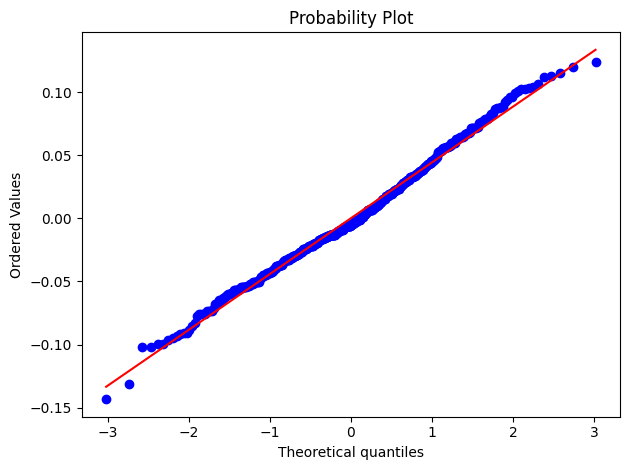

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
probplot(residuals, dist="norm", plot=plt)
plt.tight_layout()

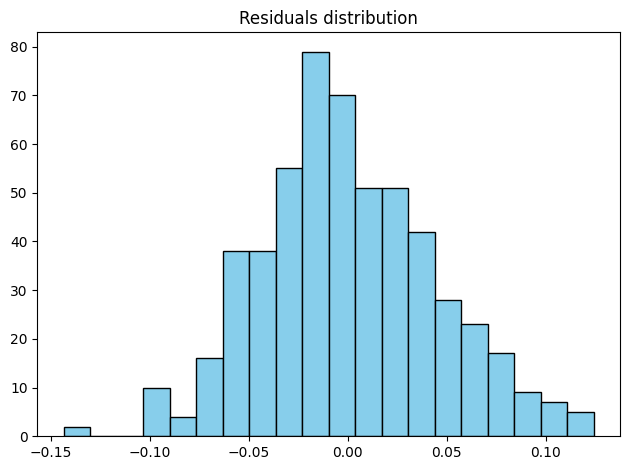

In [60]:
plt.hist(residuals, bins=20, edgecolor='black', color='skyblue')
plt.title('Residuals distribution')
plt.tight_layout()

### Verifying Assumptions of Levene test
- Independence of Observations **(Inconclusive)**
- Quantitative Test Variable this means that the data you’re testing should be something you can measure in numbers (dependent variable) **(confirmed)**
- Normality: residuals should be normally distributed in each group **(violated)**

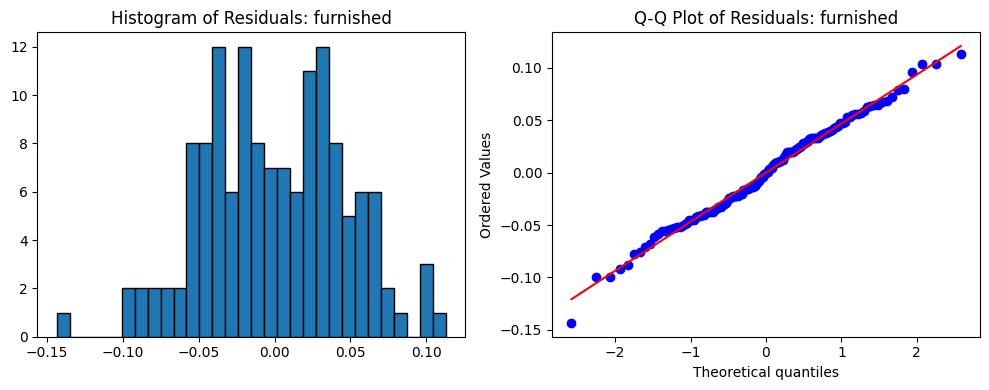

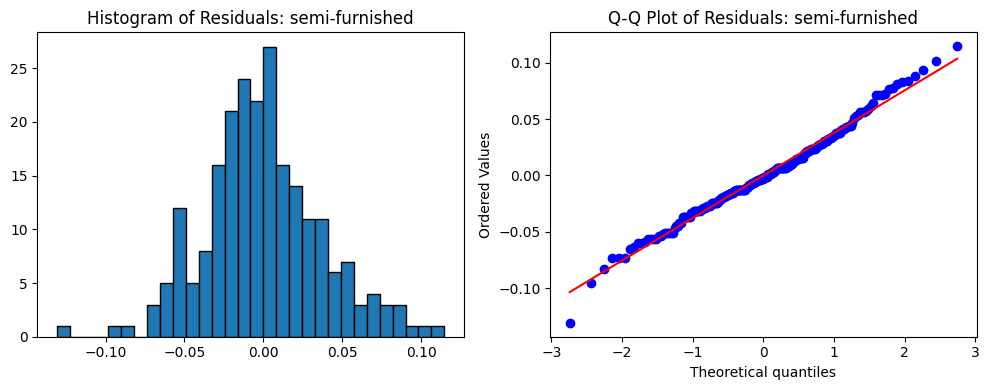

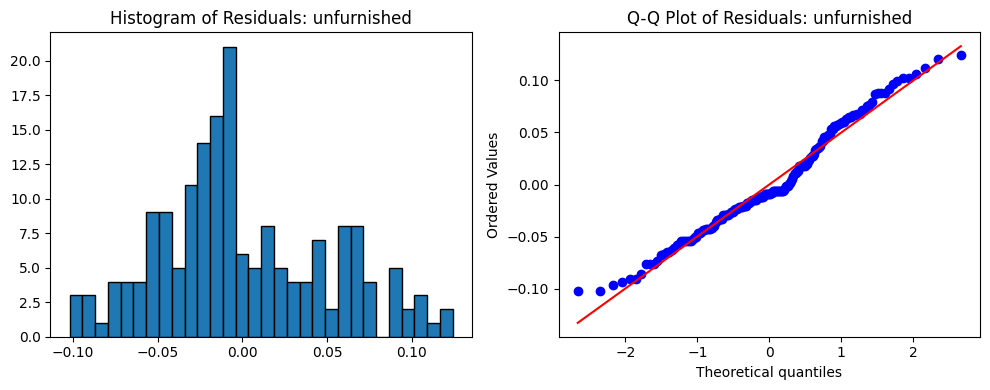

In [61]:
for group in df_copy['furnishingstatus'].unique():
    group_residuals = residuals[df_copy['furnishingstatus'] == group]
    
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    plt.hist(group_residuals, bins=30, edgecolor='black')
    plt.title(f'Histogram of Residuals: {group}')

    plt.subplot(1, 2, 2)
    probplot(group_residuals, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Residuals: {group}')

    plt.tight_layout()

In [62]:
residuals_unfurnished = residuals[df_copy['furnishingstatus'] == 'unfurnished']
residuals_semifurnished = residuals[df_copy['furnishingstatus'] == 'semi-furnished']
residuals_furnished = residuals[df_copy['furnishingstatus'] == 'furnished']

stat, p = levene(residuals_unfurnished, residuals_semifurnished, residuals_furnished)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Variances appear to be equal (fail to reject H0)')
else:
    print('Variances appear to be different (reject H0)')

Statistics=8.286, p=0.000
Variances appear to be different (reject H0)


## **Note**
- In this analysis, the Levene test was used to check the assumption of equal variances for ANOVA. It’s important to acknowledge that the assumption of normality of residuals for each group, which is a prerequisite for the Levene test, was violated in this case. Despite this violation, the decision was made to proceed with the Levene test. The test indicated unequal variances across groups. While this finding is informative, it should be interpreted with caution given the violation of the normality assumption. Further investigation may be warranted to confirm these results.

## **Interpretation of ANOVA Assumptions and Consideration of Alternative Analytical Approaches**

- **In my analysis, my aim was to understand the relationship between 'furnishing status' and 'price' using an ANOVA model. However, the assumptions of normality and homogeneity of variances, which are crucial for the validity of an ANOVA test, were violated in this case**

- **The Shapiro-Wilk test indicated that the residuals were not normally distributed, and the Levene's test suggested that the variances were not equal across all groups. These violations could potentially lead to misleading results if i proceeded with the ANOVA test.**

- **The independence of observations is a fundamental assumption in many statistical tests, including ANOVA. However, this assumption is often checked during the study design or data collection process, rather than through a statistical test. In this case, due to the nature of the data and the context of the problem, it was challenging to empirically verify this assumption. This does not necessarily invalidate the analysis, but it's an important factor to consider when interpreting the results.**

- **Given these violations, alternative statistical methods such as non-parametric tests, data transformation, or robust statistical methods may be more appropriate for the analysis. This will help ensure the reliability and validity of my findings.**

## **Kruskal-Wallis Test**

### **Assumptions of kruskal wallis test**
- Independence of Observations: The observations in each group need to be independent of each other. **(inconclusive)**
- Ordinal or Continuous Response Variable: The response variable should be an ordinal or continuous variable. **(continous variable/ confirmed)**
- Same Shape Distributions: The distributions in each group need to have a similar shape. **(violated)**

C:\Users\Bhushan\AppData\Local\Temp\ipykernel_2240\2181163270.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_a, group_b, group_c], labels=['Unfurnished', 'Semifurnished', 'Furnished'])


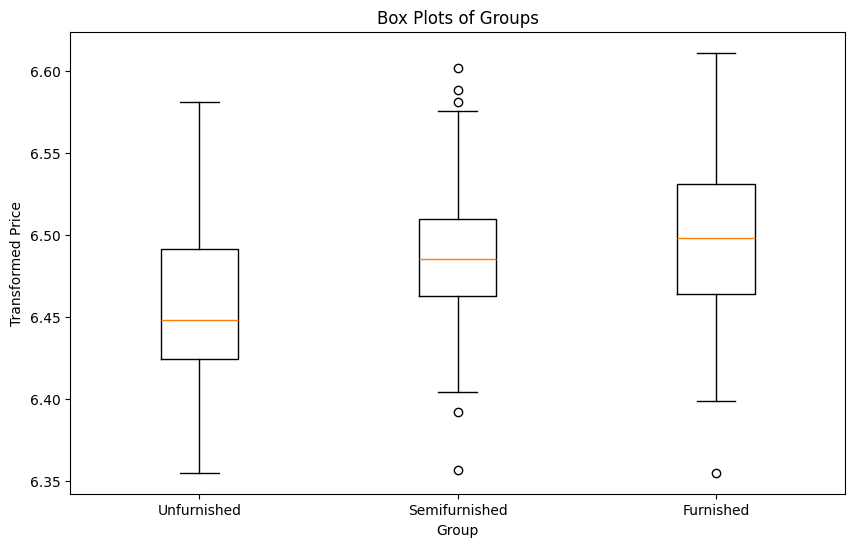

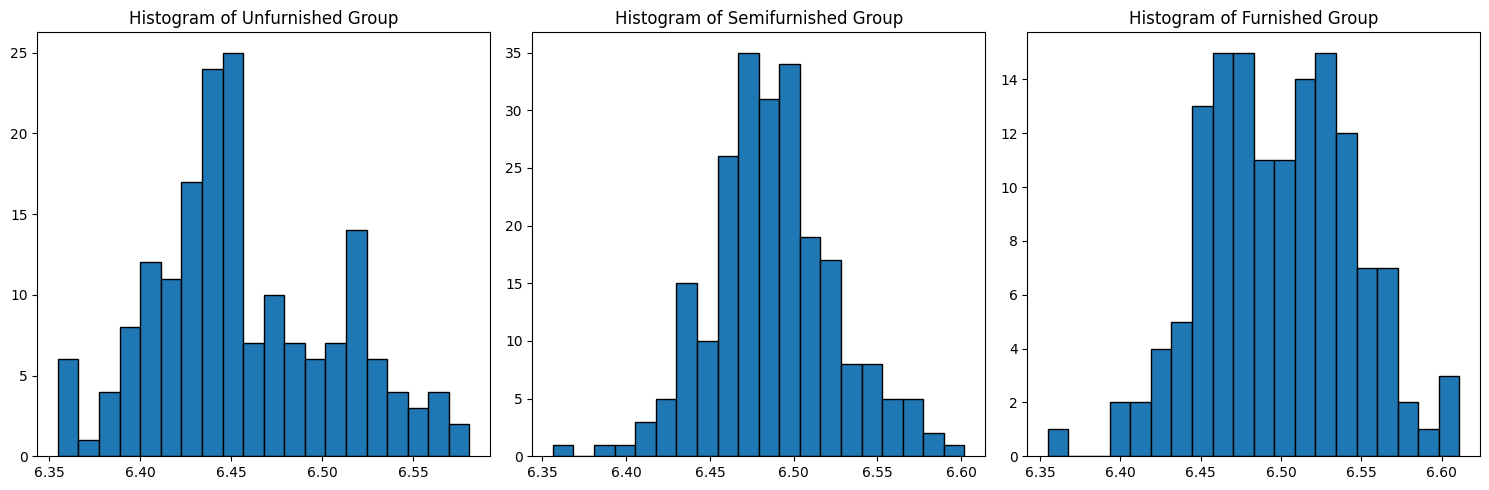

In [63]:
group_a = df_copy[df_copy['furnishingstatus'] == 'unfurnished']['transformed_price_boxcox']
group_b = df_copy[df_copy['furnishingstatus'] == 'semi-furnished']['transformed_price_boxcox']
group_c = df_copy[df_copy['furnishingstatus'] == 'furnished']['transformed_price_boxcox']

plt.figure(figsize=(10, 6))
plt.boxplot([group_a, group_b, group_c], labels=['Unfurnished', 'Semifurnished', 'Furnished'])
plt.title('Box Plots of Groups')
plt.xlabel('Group')
plt.ylabel('Transformed Price')

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(group_a, bins=20, edgecolor='k')
plt.title('Histogram of Unfurnished Group')

plt.subplot(1, 3, 2)
plt.hist(group_b, bins=20, edgecolor='k')
plt.title('Histogram of Semifurnished Group')

plt.subplot(1, 3, 3)
plt.hist(group_c, bins=20, edgecolor='k')
plt.title('Histogram of Furnished Group')

plt.tight_layout()

- After researching what to do if ANOVA assumptions are violated, I found various methods and statistical tests. To address this issue, I have decided to start with the Welch’s ANOVA.

## **Welch’s Test**

### **Assumptions of welch's test**
- Independence of Observations: The data were collected using statistically valid sampling methods, and there are no hidden relationships among observations. **(inconclusive)**
- Normally-Distributed Response Variable: assumes that the dependent variable is approximately normally distributed within each group or level of the independent variable.

- **Welch's ANOVA does not assume homogeneity of variances (equal variances across groups), making it a robust alternative to the traditional ANOVA**

In [64]:
residuals = [df_copy['transformed_price_boxcox'][df_copy['furnishingstatus'] == group] - np.mean(df_copy['transformed_price_boxcox'][df_copy['furnishingstatus'] == group]) for group in df_copy['furnishingstatus'].unique()]

for group, res in zip(df_copy['furnishingstatus'].unique(), residuals):
    stat, p = shapiro(res)
    print(f'Group {group}: Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print(f'Residuals for group {group} look Gaussian (fail to reject H0)')
    else:
        print(f'Residuals for group {group} do not look Gaussian (reject H0)')

Group furnished: Statistics=0.992, p=0.661
Residuals for group furnished look Gaussian (fail to reject H0)
Group semi-furnished: Statistics=0.990, p=0.125
Residuals for group semi-furnished look Gaussian (fail to reject H0)
Group unfurnished: Statistics=0.975, p=0.002
Residuals for group unfurnished do not look Gaussian (reject H0)


Group: furnished
Group: semi-furnished
Group: unfurnished


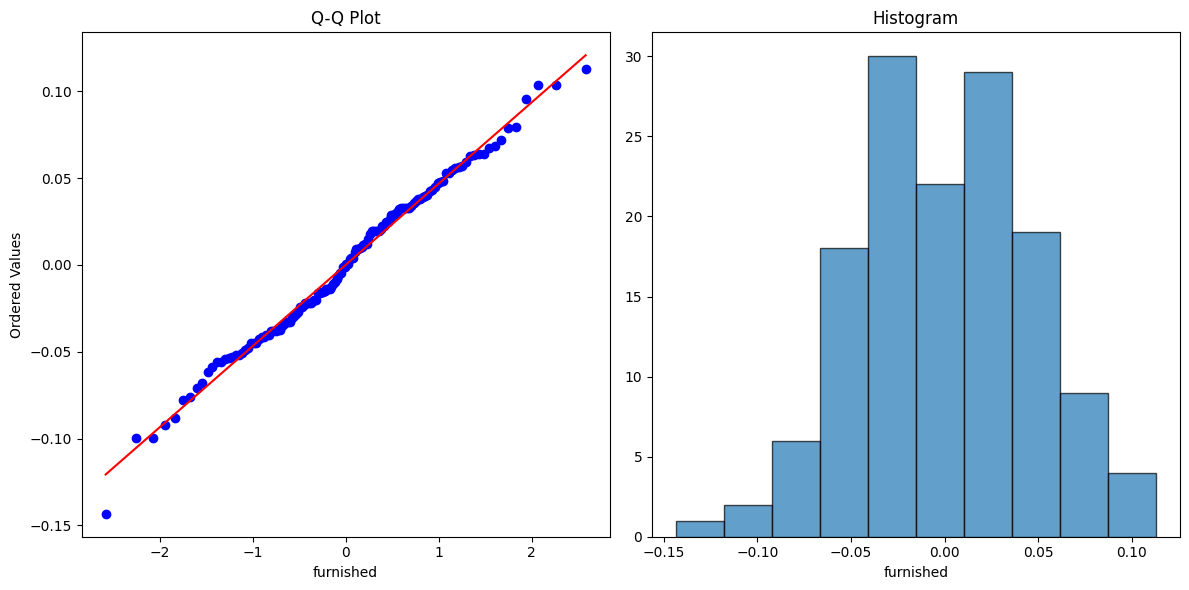

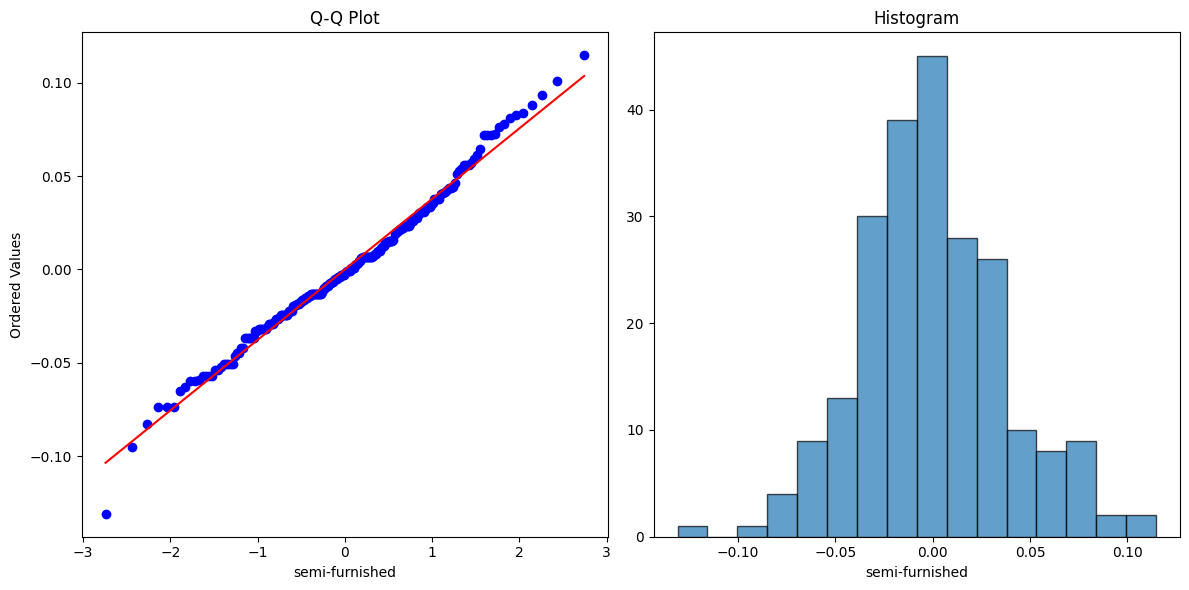

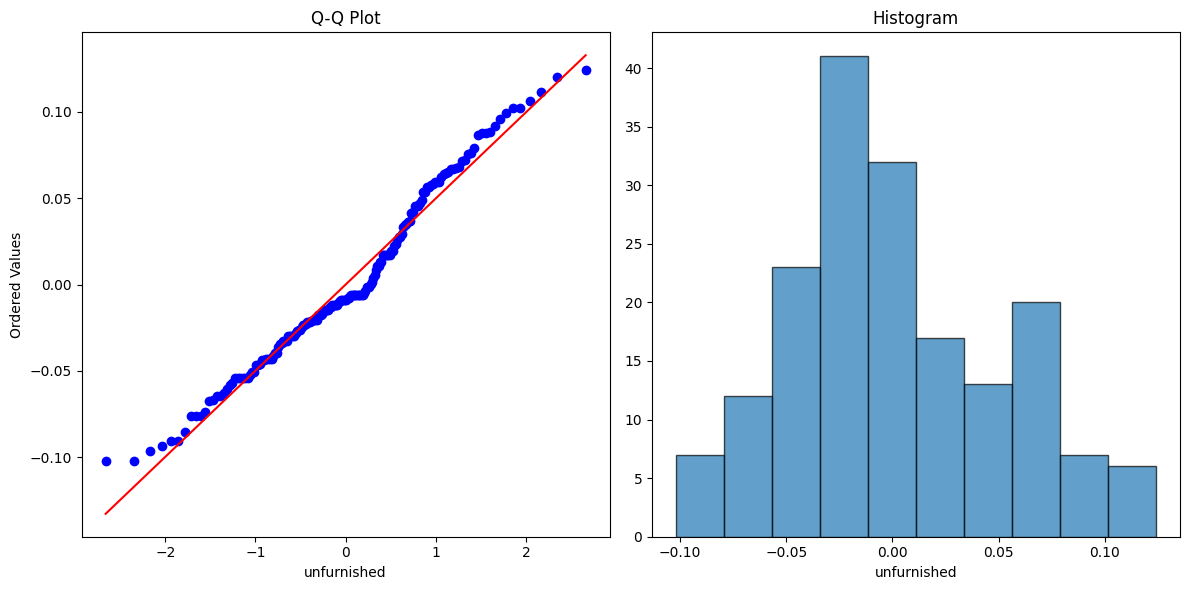

In [65]:
for group, res in zip(df_copy['furnishingstatus'].unique(), residuals):
    print(f'Group: {group}')

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    probplot(res, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    plt.xlabel(group)

    plt.subplot(1, 2, 2)
    plt.hist(res, bins='auto', alpha=0.7, edgecolor='black')
    plt.title('Histogram')
    plt.xlabel(group)

    plt.tight_layout()

### **Performing Welchs test**

In [66]:
import pingouin as pg

welch_anova_results = pg.welch_anova(dv='transformed_price_boxcox', between='furnishingstatus', data=df_copy)

print("Null Hypothesis (H0): The means of 'transformed_price_boxcox' are equal across all 'furnishingstatus' groups")
print("Alternative Hypothesis (H1): At least one group's mean of 'transformed_price_boxcox' is different from the others")

p_value = welch_anova_results.loc[0, 'p-unc']

if p_value < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in the group means.")
else:
    print("Result: Fail to reject the null hypothesis. There is not a significant difference in the group means.")

welch_anova_results

Null Hypothesis (H0): The means of 'transformed_price_boxcox' are equal across all 'furnishingstatus' groups
Alternative Hypothesis (H1): At least one group's mean of 'transformed_price_boxcox' is different from the others
Result: Reject the null hypothesis. There is a significant difference in the group means.


,Source,ddof1,ddof2,F,p-unc,np2
0,furnishingstatus,2,310.966909,33.427183,7.086262e-14,0.127115


j:\mlprojectnew\myenv\Lib\site-packages\outdated\utils.py:14: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


- **The np2 value you see in the results of Welch’s ANOVA test is a measure of effect size known as partial eta-squared (η²). It represents the proportion of the total variance in the dependent variable that is associated with or explained by the membership of different groups defined by the independent variable.**

- **A value of 0 indicates that the independent variable (furnishing status) has no effect on the dependent variable (transformed price).**

- **A value of 1 indicates that the independent variable completely determines the value of the dependent variable.**

- **Values in between 0 and 1 represent the proportion of variance in the dependent variable that can be explained by the independent variable. in the above results an np2 value of 0.127115 (or 12.7%) suggests that approximately 12.7% of the variance in price can be explained by the furnishing status.**

### **Insights**
- **Based on the results of the Welch’s ANOVA test, we reject the null hypothesis and conclude that there is a statistically significant difference in the transformed price among the different furnishing status groups. This is supported by the extremely small p-value (7.086262e-14), which is far below the typical significance level of 0.05.**
- **The F statistic is 33.427183, indicating strong evidence against the null hypothesis of equal means across the groups.**
- **The effect size, represented by np2 (partial eta squared), is 0.127115. This suggests that approximately 12.7% of the variance in the transformed price can be explained by the furnishing status.**
- **In summary, the furnishing status appears to have a significant impact on the price.**

## **Note**
- **In this data analysis, i encountered challenges with the assumptions of the Wallis test and Welch’s t-test. The Wallis test’s assumption of identical distribution shapes across groups was violated, leading me to consider Welch’s test. However, the assumption of normality of residuals within each group was not met for one group in Welch’s test. Despite these violations, i decided to proceed with Welch’s test.**

- **My decision to retain outliers was based on the belief that they may contain valuable information that could influence model predictions. Removing them could potentially lead to loss of important insights.**

- **The rationale for proceeding with Welch’s test, despite the violations, is based on the following principles:**

    1. **Central Limit Theorem (CLT): The CLT states that the arithmetic mean of a sufficiently large number of iterates of independent random variables, each with a well-defined expected value and finite variance, will be approximately normally distributed, regardless of the underlying distribution. This suggests that even if the residuals of individual groups are not perfectly normal, the distribution of the means of these groups can still be approximately normal.**
    2. **Robustness to Normality Violation: Many statistical tests, including Welch’s ANOVA, are robust to violations of the normality assumption when the sample size is large. This means that they can still provide valid results even if the data is not perfectly normal.**
    3. **Power of the Test: A larger sample size increases the power of a statistical test, making it more likely to detect a statistically significant effect if there is one.**

- **In conclusion, while the analysis may not be perfect due to the assumption violations, i believe that Welch’s test provides reasonable approach given the data. The above results and insights should be interpreted with caution, keeping these limitations in mind.**

## **Note**
- **In Exploratory Data Analysis (EDA), I leveraged AI tools to assist me in writing the code, particularly for the statistical tests. As I was unfamiliar with some of these tests, AI tools provided invaluable assistance, guiding me through the process, helping me understand the concepts, and generating the appropriate code. This collaborative approach with AI tools enabled a more efficient and effective analysis. The AI tools assistance was instrumental in navigating the complexities of statistical testing and contributed significantly to the success of this EDA.**